In [1]:
#Packages 
import numpy as np
import xgcm
from xgcm import Grid
import xarray as xr
import xroms
from datetime import datetime

import glob
from xhistogram.xarray import histogram
import cmocean.cm as cmo
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.ticker as tick
from matplotlib.dates import DateFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator
from xhistogram.xarray import histogram
from datetime import timedelta
import time

import warnings
warnings.filterwarnings("ignore") #The chaotic option, used to suppress issues with cf_time with xroms 

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import pyplot as plt, patches

In [2]:
def open_roms(path):
    ds1 = xroms.open_netcdf(path)
    ds1, grid1 = xroms.roms_dataset(ds1)
    return ds1, grid1

# HSIMT
paths_h = ['/d2/home/dylan/idealized_nummix/shelf_hsimt_uwind_zerop1_dt_30_across2x_50d_his.nc',
         '/d1/shared/shelfstrat_wind/tadv_ensembles/shelf_hsimt_uwind_zerop1_dt_30_across2x_50d_ensmb1_his.nc',
         '/d1/shared/shelfstrat_wind/tadv_ensembles/shelf_hsimt_uwind_zerop1_dt_30_across2x_50d_ensmb2_his.nc',
         '/d1/shared/shelfstrat_wind/tadv_ensembles/shelf_hsimt_uwind_zerop1_dt_30_across2x_50d_ensmb3_his.nc',
         '/d1/shared/shelfstrat_wind/tadv_ensembles/shelf_hsimt_uwind_zerop1_dt_30_across2x_50d_ensmb4_his.nc',
         '/d1/shared/shelfstrat_wind/tadv_ensembles/shelf_hsimt_uwind_zerop1_dt_30_across2x_50d_ensmb5_his.nc',
         '/d1/shared/shelfstrat_wind/tadv_ensembles/shelf_hsimt_uwind_zerop1_dt_30_across2x_50d_ensmb6_his.nc',
         '/d1/shared/shelfstrat_wind/tadv_ensembles/shelf_hsimt_uwind_zerop1_dt_30_across2x_50d_ensmb7_his.nc',
        ]
# MPDATA
paths_m = ['/d2/home/dylan/idealized_nummix/shelf_mpdata_uwind_zerop1_dt_30_across2x_50d_his.nc',
         '/d1/shared/shelfstrat_wind/tadv_ensembles/shelf_mpdata_uwind_zerop1_dt_30_across2x_50d_ensmb1_his.nc',
         '/d1/shared/shelfstrat_wind/tadv_ensembles/shelf_mpdata_uwind_zerop1_dt_30_across2x_50d_ensmb2_his.nc',
         '/d1/shared/shelfstrat_wind/tadv_ensembles/shelf_mpdata_uwind_zerop1_dt_30_across2x_50d_ensmb3_his.nc',
         '/d1/shared/shelfstrat_wind/tadv_ensembles/shelf_mpdata_uwind_zerop1_dt_30_across2x_50d_ensmb4_his.nc',
         '/d1/shared/shelfstrat_wind/tadv_ensembles/shelf_mpdata_uwind_zerop1_dt_30_across2x_50d_ensmb5_his.nc',
         '/d1/shared/shelfstrat_wind/tadv_ensembles/shelf_mpdata_uwind_zerop1_dt_30_across2x_50d_ensmb6_his.nc',
         '/d1/shared/shelfstrat_wind/tadv_ensembles/shelf_mpdata_uwind_zerop1_dt_30_across2x_50d_ensmb7_his.nc',
        ]
# U3HC4
paths_u = ['/d2/home/dylan/idealized_nummix/shelf_u3hc4_uwind_zerop1_dt_30_across2x_50d_his.nc',
         '/d1/shared/shelfstrat_wind/tadv_ensembles/shelf_u3hc4_uwind_zerop1_dt_30_across2x_50d_ensmb1_his.nc',
         '/d1/shared/shelfstrat_wind/tadv_ensembles/shelf_u3hc4_uwind_zerop1_dt_30_across2x_50d_ensmb2_his.nc',
         '/d1/shared/shelfstrat_wind/tadv_ensembles/shelf_u3hc4_uwind_zerop1_dt_30_across2x_50d_ensmb3_his.nc',
         '/d1/shared/shelfstrat_wind/tadv_ensembles/shelf_u3hc4_uwind_zerop1_dt_30_across2x_50d_ensmb4_his.nc',
         '/d1/shared/shelfstrat_wind/tadv_ensembles/shelf_u3hc4_uwind_zerop1_dt_30_across2x_50d_ensmb5_his.nc',
         '/d1/shared/shelfstrat_wind/tadv_ensembles/shelf_u3hc4_uwind_zerop1_dt_30_across2x_50d_ensmb6_his.nc',
         '/d1/shared/shelfstrat_wind/tadv_ensembles/shelf_u3hc4_uwind_zerop1_dt_30_across2x_50d_ensmb7_his.nc',
        ]

def open_roms(path):
    ds1 = xroms.open_netcdf(path)
    ds1, grid1 = xroms.roms_dataset(ds1)
    ds1 = ds1.isel(ocean_time = slice(0,721))
    return ds1, grid1

dsh = []
gridh = []

dsm = []
gridm = []

dsu = []
gridu = []
for i in range(len(paths_h)):
    ds1, grid1 = open_roms(paths_h[i])
    dsh.append(ds1)
    gridh.append(grid1)
    
    ds1, grid1 = open_roms(paths_m[i])
    dsm.append(ds1)
    gridm.append(grid1)
    
    ds1, grid1 = open_roms(paths_u[i])
    dsu.append(ds1)
    gridu.append(grid1)
    print('iter complete')

iter complete
iter complete
iter complete
iter complete
iter complete
iter complete
iter complete
iter complete


### Along-shore average temperature, salinity, and density first.
Start with one ensemble

In [3]:
xislice = slice(1,-1)
ds = dsm[0]
grid = gridm[0]

zrhomean = ds.z_rho.isel(xi_rho = xislice).mean('xi_rho')

smean = ds.salt.isel(xi_rho = xislice).mean('xi_rho')
smean = smean.assign_coords({'y_rho': ds.y_rho[:,0], 'z_rho':zrhomean})
# smean

tmean = ds.temp.isel(xi_rho = xislice).mean('xi_rho')
tmean = tmean.assign_coords({'y_rho': ds.y_rho[:,0], 'z_rho':zrhomean})

rhol = 1027*((1+7.6*(10**-4*(ds.salt-35)))-1.7*10**-4*(ds.temp-25))
rhomean = rhol.isel(xi_rho = xislice).mean('xi_rho')
rhomean = rhomean.assign_coords({'y_rho': ds.y_rho[:,0], 'z_rho':zrhomean})

zw_mean = ds.z_w.isel(xi_rho = xislice).mean('xi_rho')
zw_mean = zw_mean.assign_coords({'y_rho': ds.y_rho[:,0], 'z_w':zw_mean})

# tmean = ds.temp.isel(xi_rho = xislice).mean('xi_rho')
# rhol = 1027*((1+7.6*(10**-4*(ds.salt-35)))-1.7*10**-4*(ds.temp-25))
# rhomean = rhol.isel(xi_rho = xislice).mean('xi_rho')


# zw_mean = ds.z_w.isel(xi_rho = xislice).mean('xi_rho')


# # #x/y coordinates
# xrho = (ds.x_rho/1000)[1:].values
# yrho = (ds.y_rho/1000)[1:].values

# # #Temperature
# temp = grid.interp(ds.temp,'X')
# temp = temp.assign_coords({'z_rho_u':(ds.z_rho_u),'y_rho':(ds.y_rho),'xi_rhp':(ds.x_rho)})

# #Density from linear EOS
# rhol = 1027*((1+7.6*(10**-4*(ds.salt-35)))-1.7*10**-4*(ds.temp-25))
# rhol = grid.interp(rhol,'X')
# rhol = grid.interp(rhol,'Z', boundary = 'extend')
# rhol = rhol.assign_coords({'z_w_u':(ds.z_w_u),'y_u':(ds.y_u)})

In [4]:
print(smean[-1].min().values, smean[-1].max().values)
print(tmean[-1].min().values, tmean[-1].max().values)
print(rhomean[-1].min().values, rhomean[-1].max().values)

28.54422 35.0
14.397144 24.672226
1022.0184 1028.8511


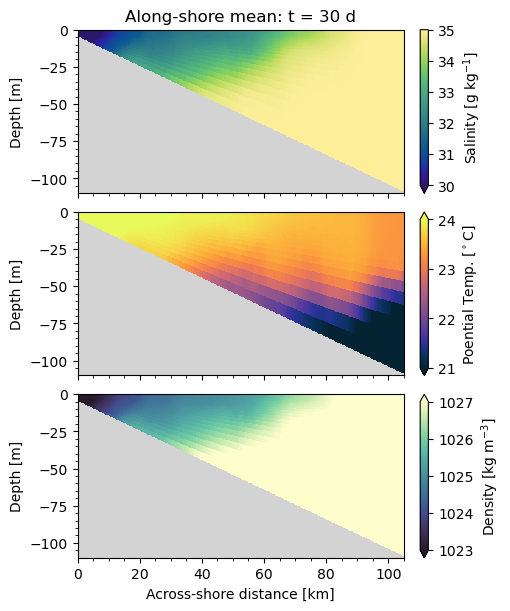

In [5]:
fig, ax = plt.subplots(3,1, figsize = (5,6), sharey = True, constrained_layout = True, dpi = 100)

s = smean[-1].plot(ax = ax[0], x = 'y_rho', y = 'z_rho', cmap = cmo.haline, vmin = 30, vmax = 35, add_colorbar = False)
t = tmean[-1].plot(ax = ax[1], x = 'y_rho', y = 'z_rho', cmap = cmo.thermal, vmin = 21, vmax = 24, add_colorbar = False)
r = rhomean[-1].plot(ax = ax[2], x = 'y_rho', y = 'z_rho', cmap = cmo.deep_r, vmin = 1023, vmax = 1027, add_colorbar = False)

for i in range(3):
    ax[i].set_xlim(0,105000)
    ax[i].set_ylim(-110,0)
    ax[i].set_ylabel('Depth [m]')
    ax[i].minorticks_on()
    ax[i].set_facecolor('lightgray')
    # zw_mean[-1][0].plot(ax = ax[i], x = 'y_rho', c = 'k', lw = 0.85)
    # ax[i].set_aspect(1/1000)
    
ax[0].set_xticklabels('')
ax[1].set_xticklabels('')
ax[2].set_xticklabels(['0', '20', '40', '60', '80', '100'])
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('Across-shore distance [km]')

ax[0].set_title('Along-shore mean: t = 30 d')
ax[1].set_title('')
ax[2].set_title('')

fig.colorbar(s, ax = ax[0], extend = 'min', label = r'Salinity [g kg$^{-1}$]')
fig.colorbar(t, ax = ax[1], extend = 'both', label = r'Poential Temp. [$^\circ$C]')
fig.colorbar(r, ax = ax[2], extend = 'both', label = r'Density [kg m$^{-3}$]')

### Remake compared to the initial condition 

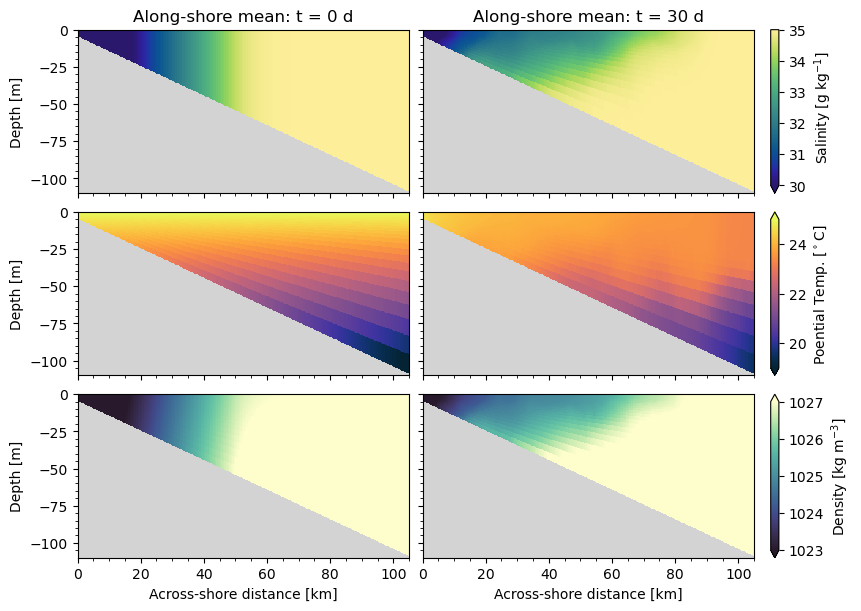

In [6]:
nrows = 3; ncols = 2
fig, ax = plt.subplots(nrows,ncols, figsize = (8.5,6), 
                       sharey = True, constrained_layout = True, dpi = 100)

s = smean[0].plot(ax = ax[0,0], x = 'y_rho', y = 'z_rho', cmap = cmo.haline, vmin = 30, vmax = 35, add_colorbar = False)
t = tmean[0].plot(ax = ax[1,0], x = 'y_rho', y = 'z_rho', cmap = cmo.thermal, vmin = 19, vmax = 25, add_colorbar = False)
r = rhomean[0].plot(ax = ax[2,0], x = 'y_rho', y = 'z_rho', cmap = cmo.deep_r, vmin = 1023, vmax = 1027, add_colorbar = False)

s1 = smean[-1].plot(ax = ax[0,1], x = 'y_rho', y = 'z_rho', cmap = cmo.haline, vmin = 30, vmax = 35, add_colorbar = False)
t1 = tmean[-1].plot(ax = ax[1,1], x = 'y_rho', y = 'z_rho', cmap = cmo.thermal, vmin = 19, vmax = 25, add_colorbar = False)
r1 = rhomean[-1].plot(ax = ax[2,1], x = 'y_rho', y = 'z_rho', cmap = cmo.deep_r, vmin = 1023, vmax = 1027, add_colorbar = False)

for i in range(nrows):
    for j in range(ncols):
        ax[i,j].set_xlim(0,105000)
        ax[i,j].set_ylim(-110,0)
        ax[i,j].set_ylabel('Depth [m]')
        ax[i,j].minorticks_on()
        ax[i,j].set_facecolor('lightgray')
        ax[i,j].set_title('')
        ax[i,1].set_ylabel('')
        ax[-1,j].set_xlabel('Across-shore distance [km]')
        # zw_mean[-1][0].plot(ax = ax[i,j], x = 'y_rho', c = 'k', lw = 0.85)

for i in range(nrows-1):
    for j in range(ncols):
        ax[i,j].set_xticklabels('')
        ax[i,j].set_xlabel('')
        ax[-1,j].set_xticks([0, 20e3, 40e3, 60e3, 80e3, 100e3])
        ax[-1,j].set_xticklabels(['0', '20', '40', '60', '80', '100'])
        
ax[0,0].set_title('Along-shore mean: t = 0 d')
ax[0,1].set_title('Along-shore mean: t = 30 d')

fig.colorbar(s1, ax = ax[0,1], extend = 'min', label = r'Salinity [g kg$^{-1}$]')
fig.colorbar(t1, ax = ax[1,1], extend = 'both', label = r'Poential Temp. [$^\circ$C]')
fig.colorbar(r1, ax = ax[2,1], extend = 'both', label = r'Density [kg m$^{-3}$]')

### Now recreate this with pure numpy

In [7]:
print(np.shape(smean[0].y_rho))
print(np.shape(smean[0].z_rho))
print(np.shape(smean[0]))

(389,)
(30, 389)
(30, 389)


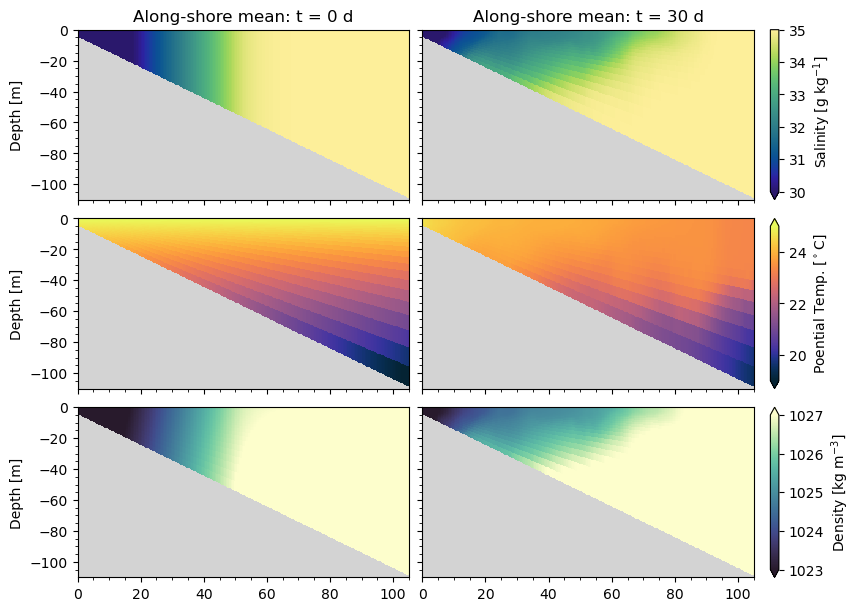

In [8]:
nrows = 3; ncols = 2
fig, ax = plt.subplots(nrows,ncols, figsize = (8.5,6), 
                       sharey = True, constrained_layout = True, dpi = 100)

s = ax[0,0].pcolormesh(smean[0].y_rho, smean[0].z_rho, smean[0], cmap = cmo.haline, vmin = 30, vmax = 35)
t = ax[1,0].pcolormesh(tmean[0].y_rho, tmean[0].z_rho, tmean[0], cmap = cmo.thermal, vmin = 19, vmax = 25)
r = ax[2,0].pcolormesh(smean[0].y_rho, smean[0].z_rho, rhomean[0], cmap = cmo.deep_r, vmin = 1023, vmax = 1027)

s1 = ax[0,1].pcolormesh(smean[-1].y_rho, smean[-1].z_rho, smean[-1], cmap = cmo.haline, vmin = 30, vmax = 35)
t1 = ax[1,1].pcolormesh(tmean[-1].y_rho, tmean[-1].z_rho, tmean[-1], cmap = cmo.thermal, vmin = 19, vmax = 25)
r1 = ax[2,1].pcolormesh(rhomean[-1].y_rho, rhomean[-1].z_rho, rhomean[-1], cmap = cmo.deep_r, vmin = 1023, vmax = 1027)

for i in range(nrows):
    for j in range(ncols):
        ax[i,j].set_xlim(0,105000)
        ax[i,j].set_ylim(-110,0)
        ax[i,j].set_ylabel('Depth [m]')
        ax[i,j].minorticks_on()
        ax[i,j].set_facecolor('lightgray')
        ax[i,j].set_title('')
        ax[i,1].set_ylabel('')
        # zw_mean[-1][0].plot(ax = ax[i,j], x = 'y_rho', c = 'k', lw = 0.85)

for i in range(nrows-1):
    for j in range(ncols):
        ax[i,j].set_xticklabels('')
        ax[i,j].set_xlabel('')
        ax[-1,j].set_xticks([0, 20e3, 40e3, 60e3, 80e3, 100e3])
        ax[-1,j].set_xticklabels(['0', '20', '40', '60', '80', '100'])
        


ax[0,0].set_title('Along-shore mean: t = 0 d')
ax[0,1].set_title('Along-shore mean: t = 30 d')

fig.colorbar(s1, ax = ax[0,1], extend = 'min', label = r'Salinity [g kg$^{-1}$]')
fig.colorbar(t1, ax = ax[1,1], extend = 'both', label = r'Poential Temp. [$^\circ$C]')
fig.colorbar(r1, ax = ax[2,1], extend = 'both', label = r'Density [kg m$^{-3}$]')

### To make this work, all we have to do is make x by a vector, then y and z have to have the same dims 

In [9]:
def alongshore_mean(ds, xislice):
    zrhomean = ds.z_rho.isel(xi_rho = xislice).mean('xi_rho')[-1]

    smean = ds.salt.isel(xi_rho = xislice).mean('xi_rho')[-1]
    smean = smean.assign_coords({'y_rho': ds.y_rho[:,0], 'z_rho':zrhomean})

    tmean = ds.temp.isel(xi_rho = xislice).mean('xi_rho')[-1]
    tmean = tmean.assign_coords({'y_rho': ds.y_rho[:,0], 'z_rho':zrhomean})

    rhol = 1027*((1+7.6*(10**-4*(ds.salt-35)))-1.7*10**-4*(ds.temp-25))
    rhomean = rhol.isel(xi_rho = xislice).mean('xi_rho')[-1]
    rhomean = rhomean.assign_coords({'y_rho': ds.y_rho[:,0], 'z_rho':zrhomean})
    
    return zrhomean, smean, tmean, rhomean

z,s,t,r = alongshore_mean(ds, xislice)

In [10]:
z_m = []
z_u = []
z_h = []
salt_m = []
salt_u = []
salt_h = []
temp_m = []
temp_u = []
temp_h = []
rho_m = []
rho_u = []
rho_h = []
for i in range(len(paths_h)):
    zrhom,saltm,tempm,rhom = alongshore_mean(dsm[i], xislice)
    zrhou,saltu,tempu,rhou = alongshore_mean(dsu[i], xislice)
    zrhoh,salth,temph,rhoh = alongshore_mean(dsh[i], xislice)
    
    z_m.append(zrhom)
    z_u.append(zrhou)
    z_h.append(zrhoh)
    
    salt_m.append(saltm)
    salt_u.append(saltu)
    salt_h.append(salth)
    
    temp_m.append(tempm)
    temp_u.append(tempu)
    temp_h.append(temph)
    
    rho_m.append(rhom)
    rho_u.append(rhou)
    rho_h.append(rhoh)

salt_m = np.array([salt_m[0], salt_m[1], salt_m[2], salt_m[3], salt_m[4], salt_m[5], salt_m[6], salt_m[7]])
temp_m = np.array([temp_m[0], temp_m[1], temp_m[2], temp_m[3], temp_m[4], temp_m[5], temp_m[6], temp_m[7]])
rho_m = np.array([rho_m[0], rho_m[1], rho_m[2], rho_m[3], rho_m[4], rho_m[5], rho_m[6], rho_m[7]])
zrho_m = np.array([z_m[0], z_m[1], z_m[2], z_m[3], z_m[4], z_m[5], z_m[6], z_m[7]])

salt_u = np.array([salt_u[0], salt_u[1], salt_u[2], salt_u[3], salt_u[4], salt_u[5], salt_u[6], salt_u[7]])
temp_u = np.array([temp_u[0], temp_u[1], temp_u[2], temp_u[3], temp_u[4], temp_u[5], temp_u[6], temp_u[7]])
rho_u = np.array([rho_u[0], rho_u[1], rho_u[2], rho_u[3], rho_u[4], rho_u[5], rho_u[6], rho_u[7]])
zrho_u = np.array([z_u[0], z_u[1], z_u[2], z_u[3], z_u[4], z_u[5], z_u[6], z_u[7]])

salt_h = np.array([salt_h[0], salt_h[1], salt_h[2], salt_h[3], salt_h[4], salt_h[5], salt_h[6], salt_h[7]])
temp_h = np.array([temp_h[0], temp_h[1], temp_h[2], temp_h[3], temp_h[4], temp_h[5], temp_h[6], temp_h[7]])
rho_h = np.array([rho_h[0], rho_h[1], rho_h[2], rho_h[3], rho_h[4], rho_h[5], rho_h[6], rho_h[7]])
zrho_h = np.array([z_h[0], z_h[1], z_h[2], z_h[3], z_h[4], z_h[5], z_h[6], z_h[7]])

In [11]:
print(np.shape(salt_m[0]))
print(np.shape(z_m[0]))
print(np.shape(salt_m[0]))

(30, 389)
(30, 389)
(30, 389)


### Now do the ensemble average at the last timestep 

In [12]:
salt_ens_m = salt_m.mean(axis = 0)
temp_ens_m = temp_m.mean(axis = 0)
rho_ens_m = rho_m.mean(axis = 0)
zrho_ens_m = zrho_m.mean(axis = 0)

salt_ens_u = salt_u.mean(axis = 0)
temp_ens_u = temp_u.mean(axis = 0)
rho_ens_u = rho_u.mean(axis = 0)
zrho_ens_u = zrho_u.mean(axis = 0)

salt_ens_h = salt_h.mean(axis = 0)
temp_ens_h = temp_h.mean(axis = 0)
rho_ens_h = rho_h.mean(axis = 0)
zrho_ens_h = zrho_h.mean(axis = 0)

### Try plotting mpdata first 

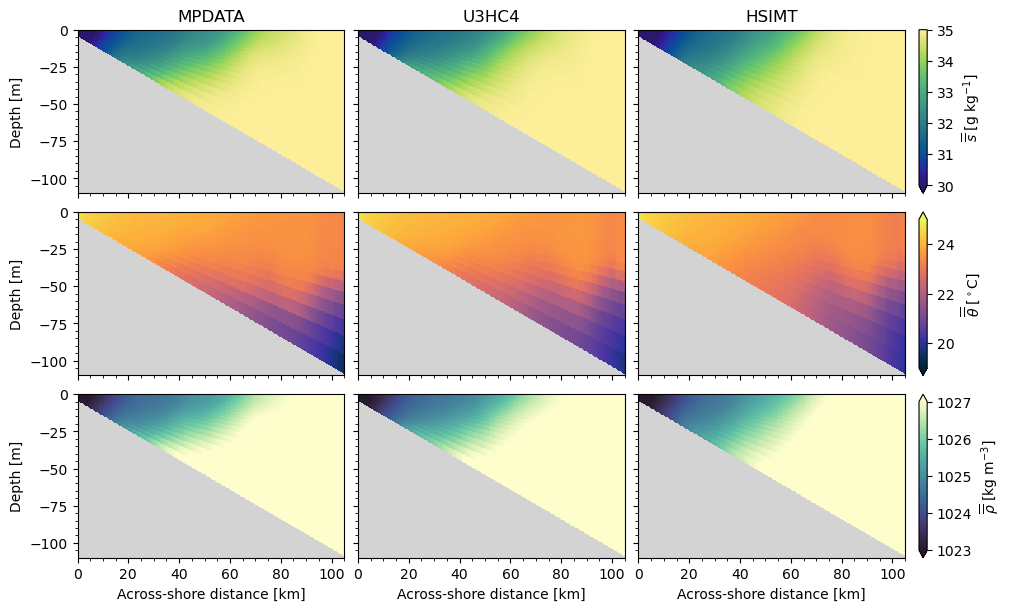

In [13]:
nrows = 3; ncols = 3
fig, ax = plt.subplots(nrows,ncols, figsize = (10,6), 
                       sharey = True, constrained_layout = True, dpi = 100)

s = ax[0,0].pcolormesh(smean[0].y_rho, zrho_ens_m, salt_ens_m, cmap = cmo.haline, vmin = 30, vmax = 35)
t = ax[1,0].pcolormesh(tmean[0].y_rho, zrho_ens_m, temp_ens_m, cmap = cmo.thermal, vmin = 19, vmax = 25)
r = ax[2,0].pcolormesh(smean[0].y_rho, zrho_ens_m, rho_ens_m, cmap = cmo.deep_r, vmin = 1023, vmax = 1027)

s1 = ax[0,1].pcolormesh(smean[0].y_rho, zrho_ens_u, salt_ens_u, cmap = cmo.haline, vmin = 30, vmax = 35)
t1 = ax[1,1].pcolormesh(tmean[0].y_rho, zrho_ens_u, temp_ens_u, cmap = cmo.thermal, vmin = 19, vmax = 25)
r1 = ax[2,1].pcolormesh(smean[0].y_rho, zrho_ens_u, rho_ens_u, cmap = cmo.deep_r, vmin = 1023, vmax = 1027)

s2 = ax[0,2].pcolormesh(smean[0].y_rho, zrho_ens_h, salt_ens_h, cmap = cmo.haline, vmin = 30, vmax = 35)
t2 = ax[1,2].pcolormesh(tmean[0].y_rho, zrho_ens_h, temp_ens_h, cmap = cmo.thermal, vmin = 19, vmax = 25)
r2 = ax[2,2].pcolormesh(smean[0].y_rho, zrho_ens_h, rho_ens_h, cmap = cmo.deep_r, vmin = 1023, vmax = 1027)

for i in range(nrows):
    for j in range(ncols):
        ax[i,j].set_xlim(0,105000)
        ax[i,j].set_ylim(-110,0)
        ax[i,j].set_ylabel('Depth [m]')
        ax[i,j].minorticks_on()
        ax[i,j].set_facecolor('lightgray')
        ax[i,j].set_title('')
        ax[i,1].set_ylabel('')
        ax[i,2].set_ylabel('')
        ax[-1,j].set_xlabel('Across-shore distance [km]')
        # zw_mean[-1][0].plot(ax = ax[i,j], x = 'y_rho', c = 'k', lw = 0.85)

for i in range(nrows-1):
    for j in range(ncols):
        ax[i,j].set_xticklabels('')
        ax[i,j].set_xlabel('')
        ax[-1,j].set_xticks([0, 20e3, 40e3, 60e3, 80e3, 100e3])
        ax[-1,j].set_xticklabels(['0', '20', '40', '60', '80', '100'])
        
ax[0,0].set_title(r'MPDATA')
ax[0,1].set_title(r'U3HC4')
ax[0,2].set_title(r'HSIMT')

fig.colorbar(s1, ax = ax[0,-1], extend = 'min', label = r'$\overline{\overline{s}}$ [g kg$^{-1}$]')
fig.colorbar(t1, ax = ax[1,-1], extend = 'both', label = r'$\overline{\overline{\theta}}$ [$^\circ$C]')
fig.colorbar(r1, ax = ax[2,-1], extend = 'both', label = r'$\overline{\overline{\rho}}$ [kg m$^{-3}$]')

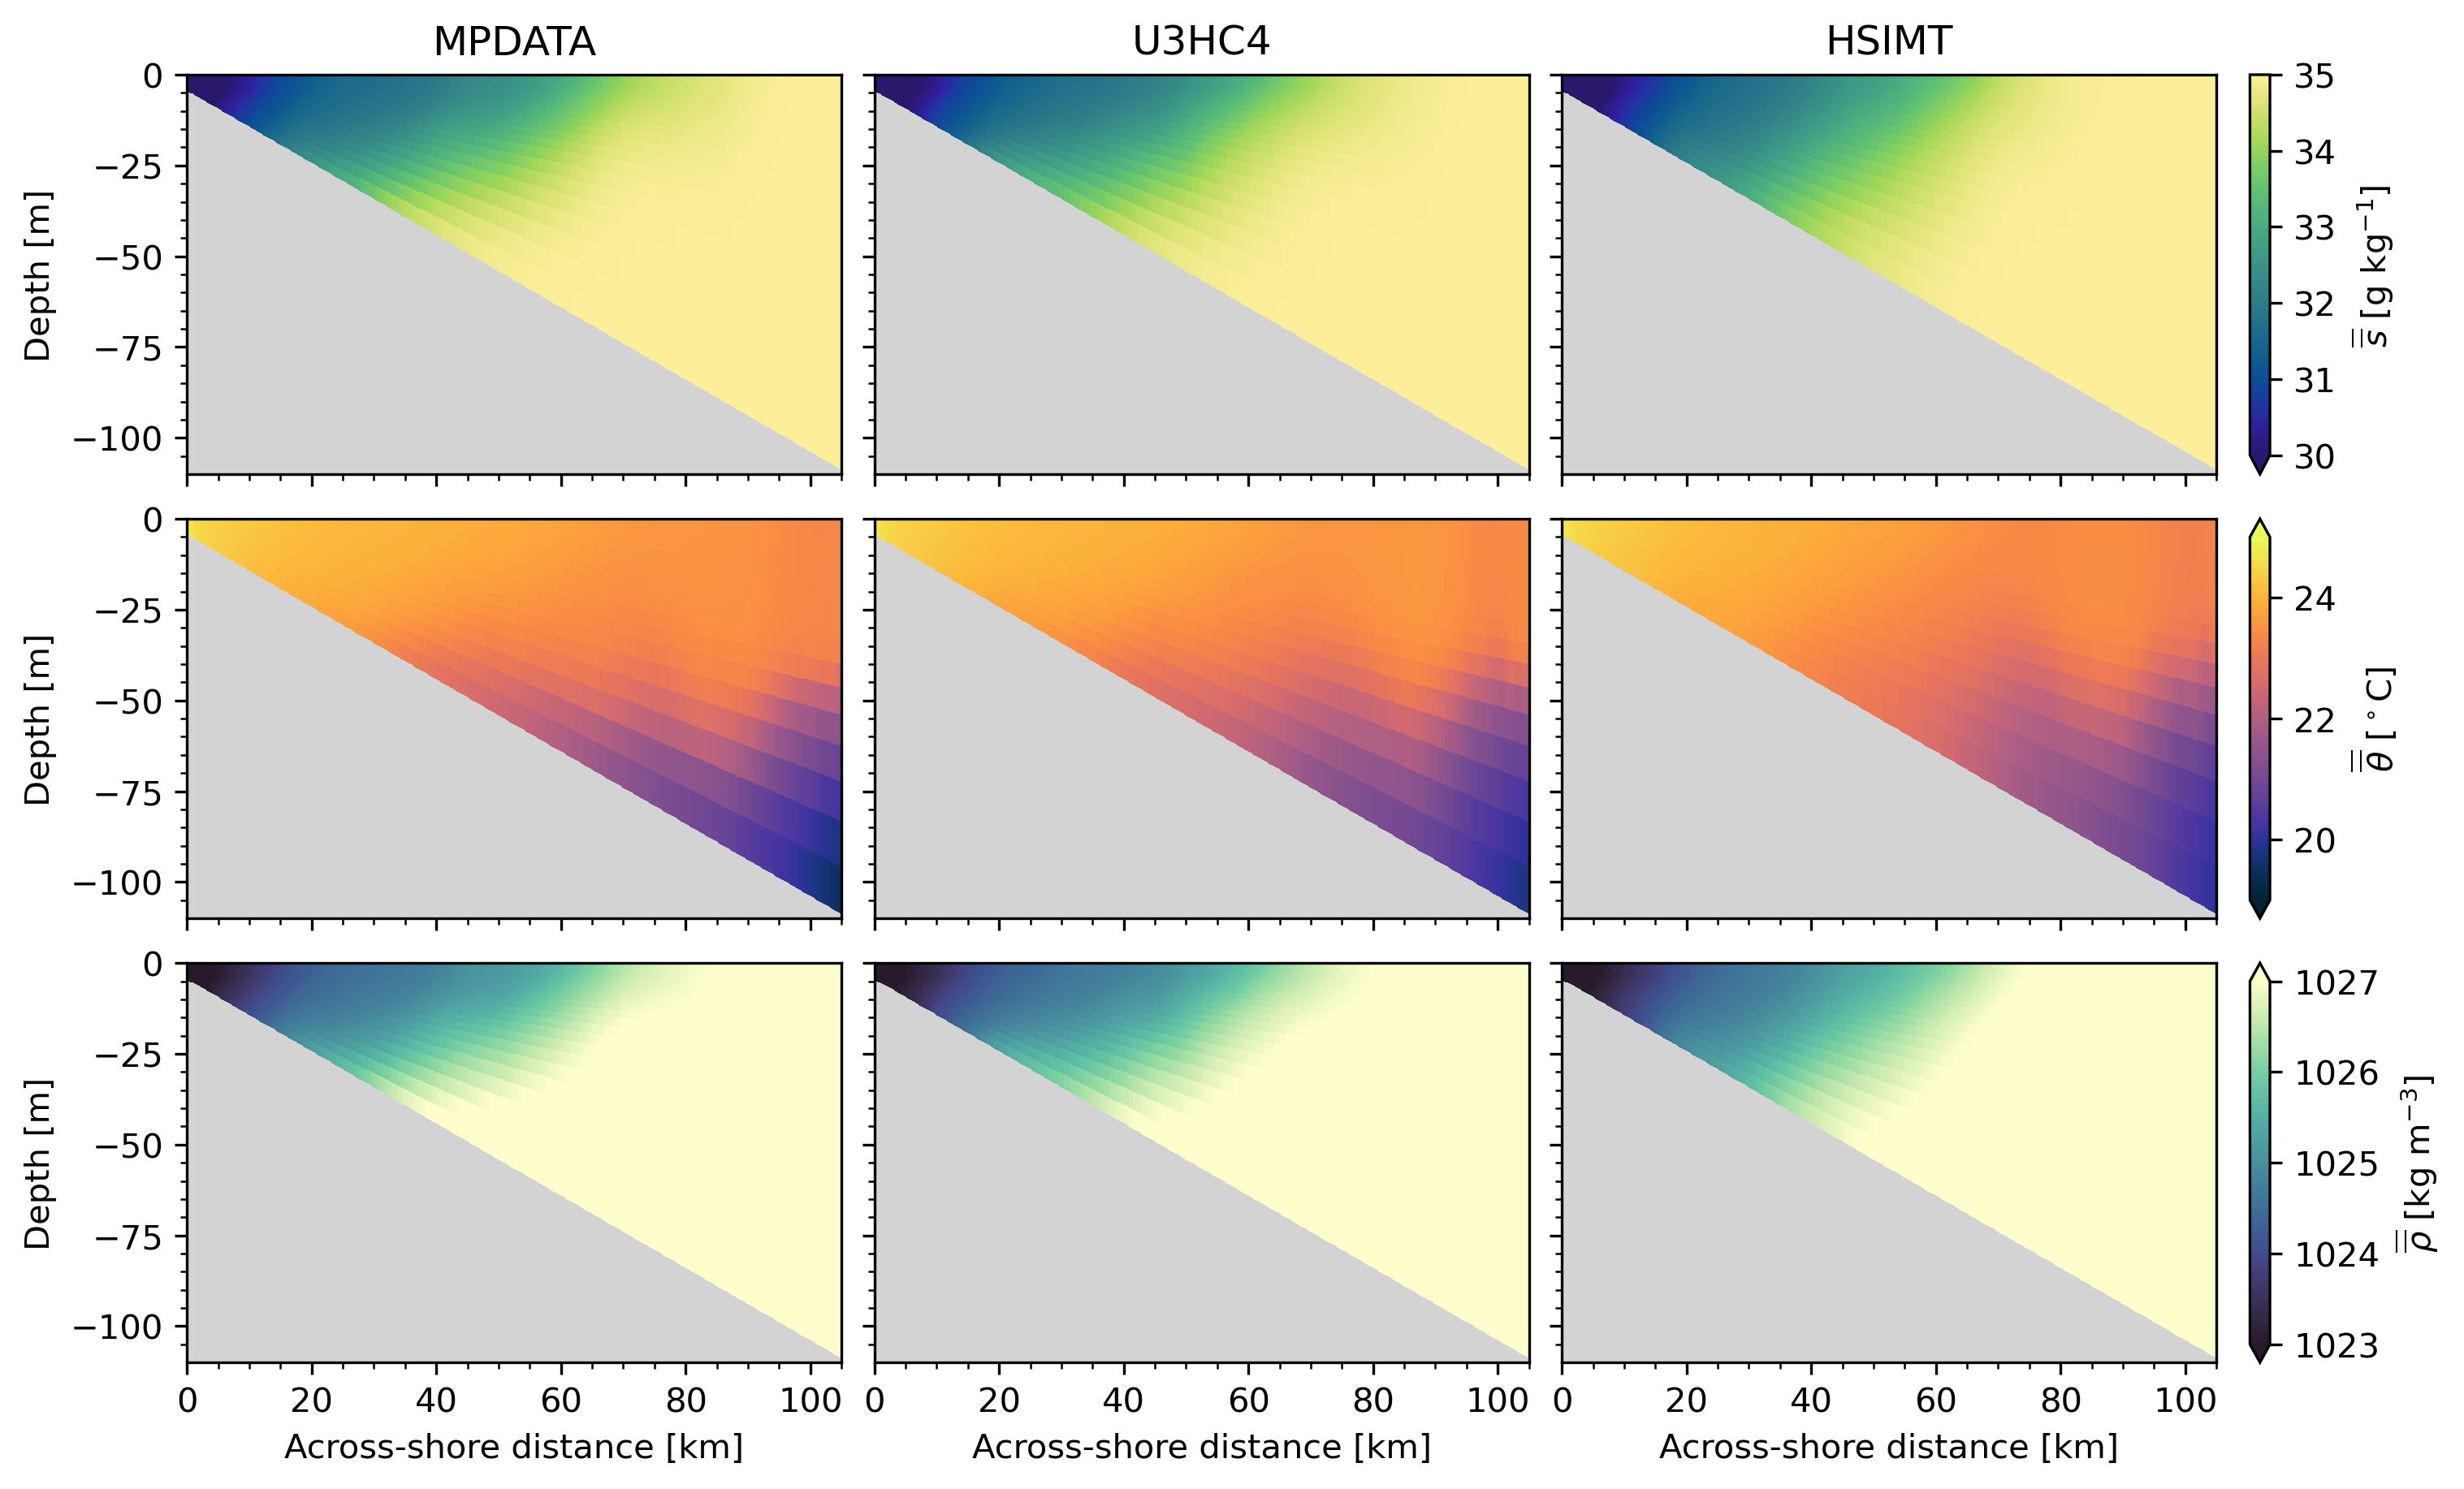

In [14]:
nrows = 3; ncols = 3
fig, ax = plt.subplots(nrows,ncols, figsize = (10,6), 
                       sharey = True, constrained_layout = True, dpi = 300)

s = ax[0,0].pcolormesh(smean[0].y_rho, zrho_ens_m, salt_ens_m, cmap = cmo.haline, vmin = 30, vmax = 35)
t = ax[1,0].pcolormesh(tmean[0].y_rho, zrho_ens_m, temp_ens_m, cmap = cmo.thermal, vmin = 19, vmax = 25)
r = ax[2,0].pcolormesh(smean[0].y_rho, zrho_ens_m, rho_ens_m, cmap = cmo.deep_r, vmin = 1023, vmax = 1027)

s1 = ax[0,1].pcolormesh(smean[0].y_rho, zrho_ens_u, salt_ens_u, cmap = cmo.haline, vmin = 30, vmax = 35)
t1 = ax[1,1].pcolormesh(tmean[0].y_rho, zrho_ens_u, temp_ens_u, cmap = cmo.thermal, vmin = 19, vmax = 25)
r1 = ax[2,1].pcolormesh(smean[0].y_rho, zrho_ens_u, rho_ens_u, cmap = cmo.deep_r, vmin = 1023, vmax = 1027)

s2 = ax[0,2].pcolormesh(smean[0].y_rho, zrho_ens_h, salt_ens_h, cmap = cmo.haline, vmin = 30, vmax = 35)
t2 = ax[1,2].pcolormesh(tmean[0].y_rho, zrho_ens_h, temp_ens_h, cmap = cmo.thermal, vmin = 19, vmax = 25)
r2 = ax[2,2].pcolormesh(smean[0].y_rho, zrho_ens_h, rho_ens_h, cmap = cmo.deep_r, vmin = 1023, vmax = 1027)

for i in range(nrows):
    for j in range(ncols):
        ax[i,j].set_xlim(0,105000)
        ax[i,j].set_ylim(-110,0)
        ax[i,j].set_ylabel('Depth [m]')
        ax[i,j].minorticks_on()
        ax[i,j].set_facecolor('lightgray')
        ax[i,j].set_title('')
        ax[i,1].set_ylabel('')
        ax[i,2].set_ylabel('')
        ax[-1,j].set_xlabel('Across-shore distance [km]')
        # zw_mean[-1][0].plot(ax = ax[i,j], x = 'y_rho', c = 'k', lw = 0.85)

for i in range(nrows-1):
    for j in range(ncols):
        ax[i,j].set_xticklabels('')
        ax[i,j].set_xlabel('')
        ax[-1,j].set_xticks([0, 20e3, 40e3, 60e3, 80e3, 100e3])
        ax[-1,j].set_xticklabels(['0', '20', '40', '60', '80', '100'])
        
ax[0,0].set_title(r'MPDATA')
ax[0,1].set_title(r'U3HC4')
ax[0,2].set_title(r'HSIMT')

fig.colorbar(s1, ax = ax[0,-1], extend = 'min', label = r'$\overline{\overline{s}}$ [g kg$^{-1}$]')
fig.colorbar(t1, ax = ax[1,-1], extend = 'both', label = r'$\overline{\overline{\theta}}$ [$^\circ$C]')
fig.colorbar(r1, ax = ax[2,-1], extend = 'both', label = r'$\overline{\overline{\rho}}$ [kg m$^{-3}$]')

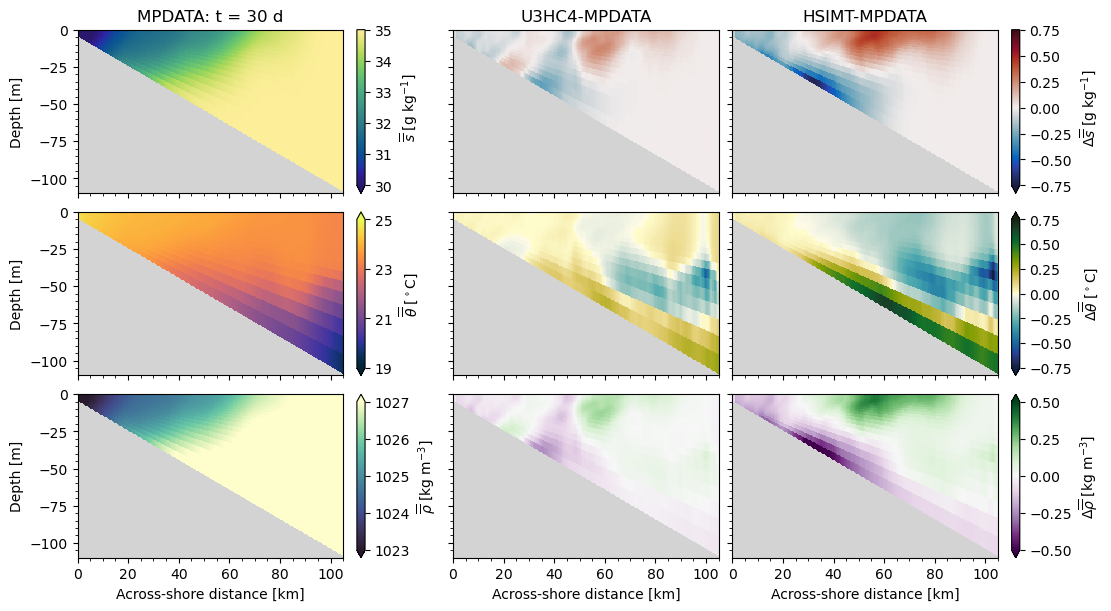

In [15]:
nrows = 3; ncols = 3
fig, ax = plt.subplots(nrows,ncols, figsize = (11,6), 
                       sharey = True, constrained_layout = True, dpi = 100)

s = ax[0,0].pcolormesh(smean[0].y_rho, zrho_ens_m, salt_ens_m, cmap = cmo.haline, vmin = 30, vmax = 35)
t = ax[1,0].pcolormesh(tmean[0].y_rho, zrho_ens_m, temp_ens_m, cmap = cmo.thermal, vmin = 19, vmax = 25)
r = ax[2,0].pcolormesh(smean[0].y_rho, zrho_ens_m, rho_ens_m, cmap = cmo.deep_r, vmin = 1023, vmax = 1027)

s1 = ax[0,1].pcolormesh(smean[0].y_rho, zrho_ens_u, salt_ens_u-salt_ens_m, cmap = cmo.balance, vmin = -0.75, vmax = 0.75)
t1 = ax[1,1].pcolormesh(tmean[0].y_rho, zrho_ens_u, temp_ens_u-temp_ens_m, cmap = cmo.delta, vmin = -0.75, vmax = 0.75)
r1 = ax[2,1].pcolormesh(smean[0].y_rho, zrho_ens_u, rho_ens_u-rho_ens_m, cmap = plt.get_cmap('PRGn'), vmin = -0.5, vmax = 0.5)

s2 = ax[0,2].pcolormesh(smean[0].y_rho, zrho_ens_h, salt_ens_h-salt_ens_m, cmap = cmo.balance, vmin = -0.75, vmax = 0.75)
t2 = ax[1,2].pcolormesh(tmean[0].y_rho, zrho_ens_h, temp_ens_h-temp_ens_m, cmap = cmo.delta, vmin = -0.75, vmax = 0.75)
r2 = ax[2,2].pcolormesh(smean[0].y_rho, zrho_ens_h, rho_ens_h-rho_ens_m, cmap = plt.get_cmap('PRGn'), vmin = -0.5, vmax = 0.5)

for i in range(nrows):
    for j in range(ncols):
        ax[i,j].set_xlim(0,105000)
        ax[i,j].set_ylim(-110,0)
        ax[i,j].set_ylabel('Depth [m]')
        ax[i,j].minorticks_on()
        ax[i,j].set_facecolor('lightgray')
        ax[i,j].set_title('')
        ax[i,1].set_ylabel('')
        ax[i,2].set_ylabel('')
        ax[-1,j].set_xlabel('Across-shore distance [km]')
        # zw_mean[-1][0].plot(ax = ax[i,j], x = 'y_rho', c = 'k', lw = 0.85)

for i in range(nrows-1):
    for j in range(ncols):
        ax[i,j].set_xticklabels('')
        ax[i,j].set_xlabel('')
        ax[-1,j].set_xticks([0, 20e3, 40e3, 60e3, 80e3, 100e3])
        ax[-1,j].set_xticklabels(['0', '20', '40', '60', '80', '100'])
        
ax[0,0].set_title(r'MPDATA: t = 30 d')
ax[0,1].set_title(r'U3HC4-MPDATA')
ax[0,2].set_title(r'HSIMT-MPDATA')

fig.colorbar(s, ax = ax[0,0], extend = 'min', label = r'$\overline{\overline{s}}$ [g kg$^{-1}$]')
fig.colorbar(t, ax = ax[1,0], extend = 'both', ticks = np.arange(19,27,2), label = r'$\overline{\overline{\theta}}$ [$^\circ$C]')
fig.colorbar(r, ax = ax[2,0], extend = 'both', label = r'$\overline{\overline{\rho}}$ [kg m$^{-3}$]')

fig.colorbar(s2, ax = ax[0,2], extend = 'min', ticks = np.arange(-0.75,1,0.25), label = r'$\Delta \overline{\overline{s}}$ [g kg$^{-1}$]')
fig.colorbar(t2, ax = ax[1,2], extend = 'both', ticks = np.arange(-0.75,1,0.25), label = r'$\Delta \overline{\overline{\theta}}$ [$^\circ$C]')
fig.colorbar(r2, ax = ax[2,2], extend = 'both', ticks = np.arange(-0.5,0.75,0.25), label = r'$\Delta \overline{\overline{\rho}}$ [kg m$^{-3}$]')

### Extend that offshore boundary just a touch - maybe to 120 km? 

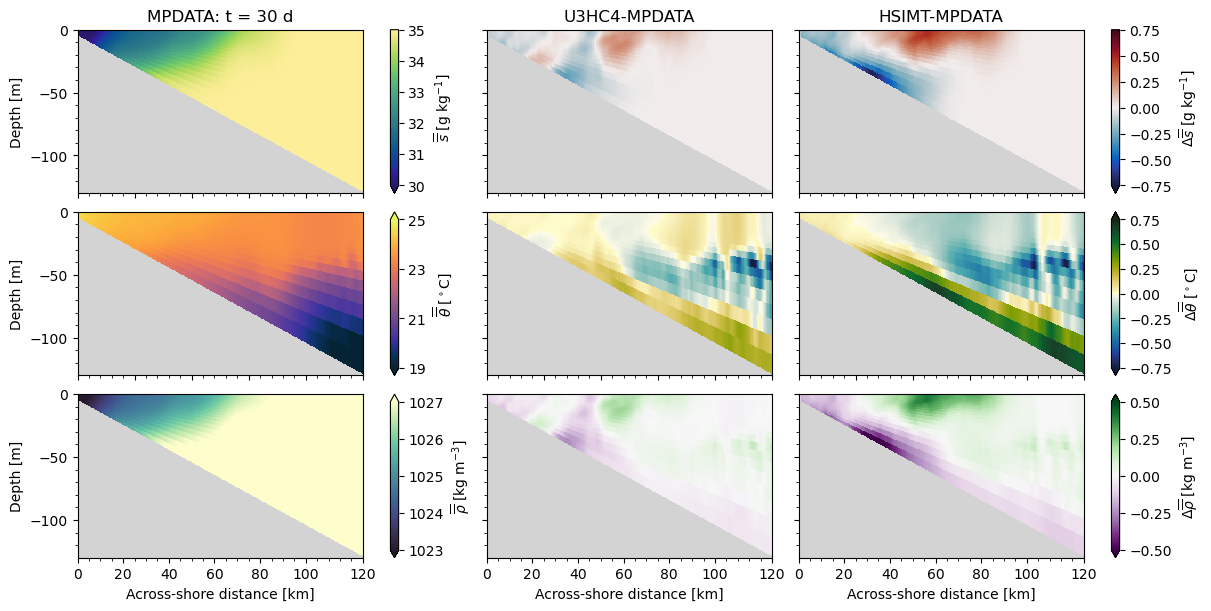

In [16]:
nrows = 3; ncols = 3
fig, ax = plt.subplots(nrows,ncols, figsize = (12,6), 
                       sharey = True, constrained_layout = True, dpi = 100)

#The across-shore coordinate is the same for all simulations, so recycle it as the x input
s = ax[0,0].pcolormesh(smean[0].y_rho, zrho_ens_m, salt_ens_m, cmap = cmo.haline, vmin = 30, vmax = 35)
t = ax[1,0].pcolormesh(tmean[0].y_rho, zrho_ens_m, temp_ens_m, cmap = cmo.thermal, vmin = 19, vmax = 25)
r = ax[2,0].pcolormesh(smean[0].y_rho, zrho_ens_m, rho_ens_m, cmap = cmo.deep_r, vmin = 1023, vmax = 1027)

s1 = ax[0,1].pcolormesh(smean[0].y_rho, zrho_ens_u, salt_ens_u-salt_ens_m, cmap = cmo.balance, vmin = -0.75, vmax = 0.75)
t1 = ax[1,1].pcolormesh(tmean[0].y_rho, zrho_ens_u, temp_ens_u-temp_ens_m, cmap = cmo.delta, vmin = -0.75, vmax = 0.75)
r1 = ax[2,1].pcolormesh(smean[0].y_rho, zrho_ens_u, rho_ens_u-rho_ens_m, cmap = plt.get_cmap('PRGn'), vmin = -0.5, vmax = 0.5)

s2 = ax[0,2].pcolormesh(smean[0].y_rho, zrho_ens_h, salt_ens_h-salt_ens_m, cmap = cmo.balance, vmin = -0.75, vmax = 0.75)
t2 = ax[1,2].pcolormesh(tmean[0].y_rho, zrho_ens_h, temp_ens_h-temp_ens_m, cmap = cmo.delta, vmin = -0.75, vmax = 0.75)
r2 = ax[2,2].pcolormesh(smean[0].y_rho, zrho_ens_h, rho_ens_h-rho_ens_m, cmap = plt.get_cmap('PRGn'), vmin = -0.5, vmax = 0.5)

for i in range(nrows):
    for j in range(ncols):
        ax[i,j].set_xlim(0,125000)
        ax[i,j].set_ylim(-130,0)
        ax[i,j].set_ylabel('Depth [m]')
        ax[i,j].minorticks_on()
        ax[i,j].set_facecolor('lightgray')
        ax[i,j].set_title('')
        ax[i,1].set_ylabel('')
        ax[i,2].set_ylabel('')
        ax[-1,j].set_xlabel('Across-shore distance [km]')
        # zw_mean[-1][0].plot(ax = ax[i,j], x = 'y_rho', c = 'k', lw = 0.85)

for i in range(nrows-1):
    for j in range(ncols):
        ax[i,j].set_xticklabels('')
        ax[i,j].set_xlabel('')
        ax[-1,j].set_xticks([0, 20e3, 40e3, 60e3, 80e3, 100e3, 125e3])
        ax[-1,j].set_xticklabels(['0', '20', '40', '60', '80', '100', '120'])
        
ax[0,0].set_title(r'MPDATA: t = 30 d')
ax[0,1].set_title(r'U3HC4-MPDATA')
ax[0,2].set_title(r'HSIMT-MPDATA')

fig.colorbar(s, ax = ax[0,0], extend = 'min', label = r'$\overline{\overline{s}}$ [g kg$^{-1}$]')
fig.colorbar(t, ax = ax[1,0], extend = 'both', ticks = np.arange(19,27,2), label = r'$\overline{\overline{\theta}}$ [$^\circ$C]')
fig.colorbar(r, ax = ax[2,0], extend = 'both', label = r'$\overline{\overline{\rho}}$ [kg m$^{-3}$]')

fig.colorbar(s2, ax = ax[0,2], extend = 'min', ticks = np.arange(-0.75,1,0.25), label = r'$\Delta \overline{\overline{s}}$ [g kg$^{-1}$]')
fig.colorbar(t2, ax = ax[1,2], extend = 'both', ticks = np.arange(-0.75,1,0.25), label = r'$\Delta \overline{\overline{\theta}}$ [$^\circ$C]')
fig.colorbar(r2, ax = ax[2,2], extend = 'both', ticks = np.arange(-0.5,0.75,0.25), label = r'$\Delta \overline{\overline{\rho}}$ [kg m$^{-3}$]')

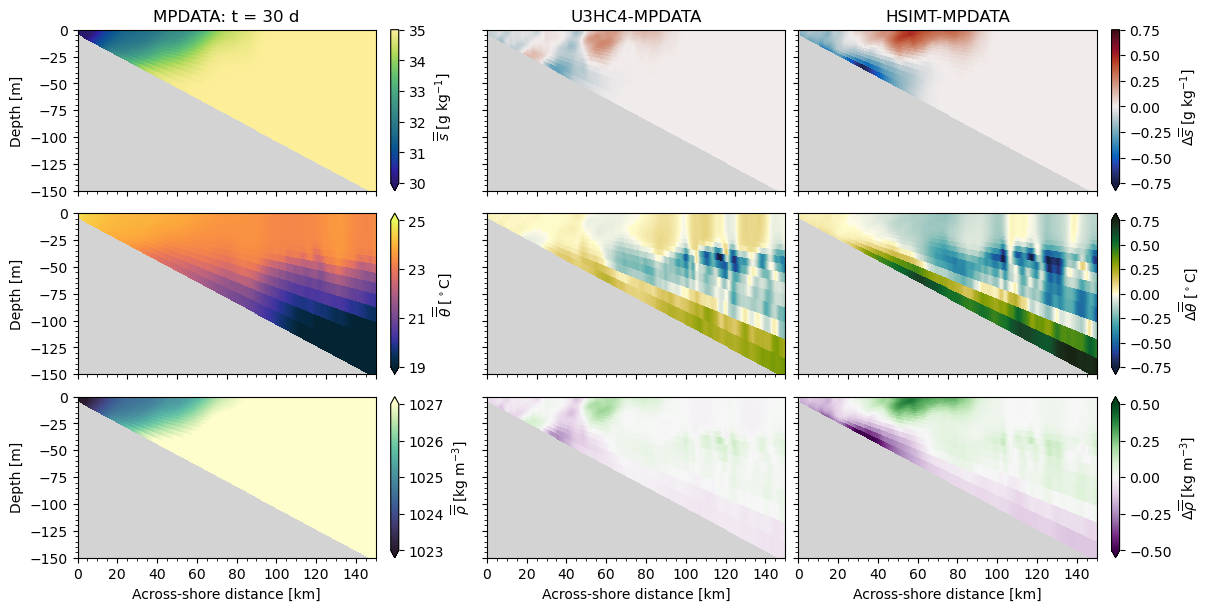

In [17]:
nrows = 3; ncols = 3
fig, ax = plt.subplots(nrows,ncols, figsize = (12,6), 
                       sharey = True, constrained_layout = True, dpi = 100)

#The across-shore coordinate is the same for all simulations, so recycle it as the x input
s = ax[0,0].pcolormesh(smean[0].y_rho, zrho_ens_m, salt_ens_m, cmap = cmo.haline, vmin = 30, vmax = 35)
t = ax[1,0].pcolormesh(tmean[0].y_rho, zrho_ens_m, temp_ens_m, cmap = cmo.thermal, vmin = 19, vmax = 25)
r = ax[2,0].pcolormesh(smean[0].y_rho, zrho_ens_m, rho_ens_m, cmap = cmo.deep_r, vmin = 1023, vmax = 1027)

s1 = ax[0,1].pcolormesh(smean[0].y_rho, zrho_ens_u, salt_ens_u-salt_ens_m, cmap = cmo.balance, vmin = -0.75, vmax = 0.75)
t1 = ax[1,1].pcolormesh(tmean[0].y_rho, zrho_ens_u, temp_ens_u-temp_ens_m, cmap = cmo.delta, vmin = -0.75, vmax = 0.75)
r1 = ax[2,1].pcolormesh(smean[0].y_rho, zrho_ens_u, rho_ens_u-rho_ens_m, cmap = plt.get_cmap('PRGn'), vmin = -0.5, vmax = 0.5)

s2 = ax[0,2].pcolormesh(smean[0].y_rho, zrho_ens_h, salt_ens_h-salt_ens_m, cmap = cmo.balance, vmin = -0.75, vmax = 0.75)
t2 = ax[1,2].pcolormesh(tmean[0].y_rho, zrho_ens_h, temp_ens_h-temp_ens_m, cmap = cmo.delta, vmin = -0.75, vmax = 0.75)
r2 = ax[2,2].pcolormesh(smean[0].y_rho, zrho_ens_h, rho_ens_h-rho_ens_m, cmap = plt.get_cmap('PRGn'), vmin = -0.5, vmax = 0.5)

for i in range(nrows):
    for j in range(ncols):
        ax[i,j].set_xlim(0,150000)
        ax[i,j].set_ylim(-150,0)
        ax[i,j].set_ylabel('Depth [m]')
        ax[i,j].minorticks_on()
        ax[i,j].set_facecolor('lightgray')
        ax[i,j].set_title('')
        ax[i,1].set_ylabel('')
        ax[i,2].set_ylabel('')
        ax[-1,j].set_xlabel('Across-shore distance [km]')
        ax[0,j].set_yticks(np.arange(-150,25,25))
        # zw_mean[-1][0].plot(ax = ax[i,j], x = 'y_rho', c = 'k', lw = 0.85)

for i in range(nrows-1):
    for j in range(ncols):
        ax[i,j].set_xticklabels('')
        ax[i,j].set_xlabel('')
        ax[-1,j].set_xticks([0, 20e3, 40e3, 60e3, 80e3, 100e3, 120e3, 140e3])
        ax[-1,j].set_xticklabels(['0', '20', '40', '60', '80', '100', '120', '140'])
        
ax[0,0].set_title(r'MPDATA: t = 30 d')
ax[0,1].set_title(r'U3HC4-MPDATA')
ax[0,2].set_title(r'HSIMT-MPDATA')

fig.colorbar(s, ax = ax[0,0], extend = 'min', label = r'$\overline{\overline{s}}$ [g kg$^{-1}$]')
fig.colorbar(t, ax = ax[1,0], extend = 'both', ticks = np.arange(19,27,2), label = r'$\overline{\overline{\theta}}$ [$^\circ$C]')
fig.colorbar(r, ax = ax[2,0], extend = 'both', label = r'$\overline{\overline{\rho}}$ [kg m$^{-3}$]')

fig.colorbar(s2, ax = ax[0,2], extend = 'min', ticks = np.arange(-0.75,1,0.25), label = r'$\Delta \overline{\overline{s}}$ [g kg$^{-1}$]')
fig.colorbar(t2, ax = ax[1,2], extend = 'both', ticks = np.arange(-0.75,1,0.25), label = r'$\Delta \overline{\overline{\theta}}$ [$^\circ$C]')
fig.colorbar(r2, ax = ax[2,2], extend = 'both', ticks = np.arange(-0.5,0.75,0.25), label = r'$\Delta \overline{\overline{\rho}}$ [kg m$^{-3}$]')

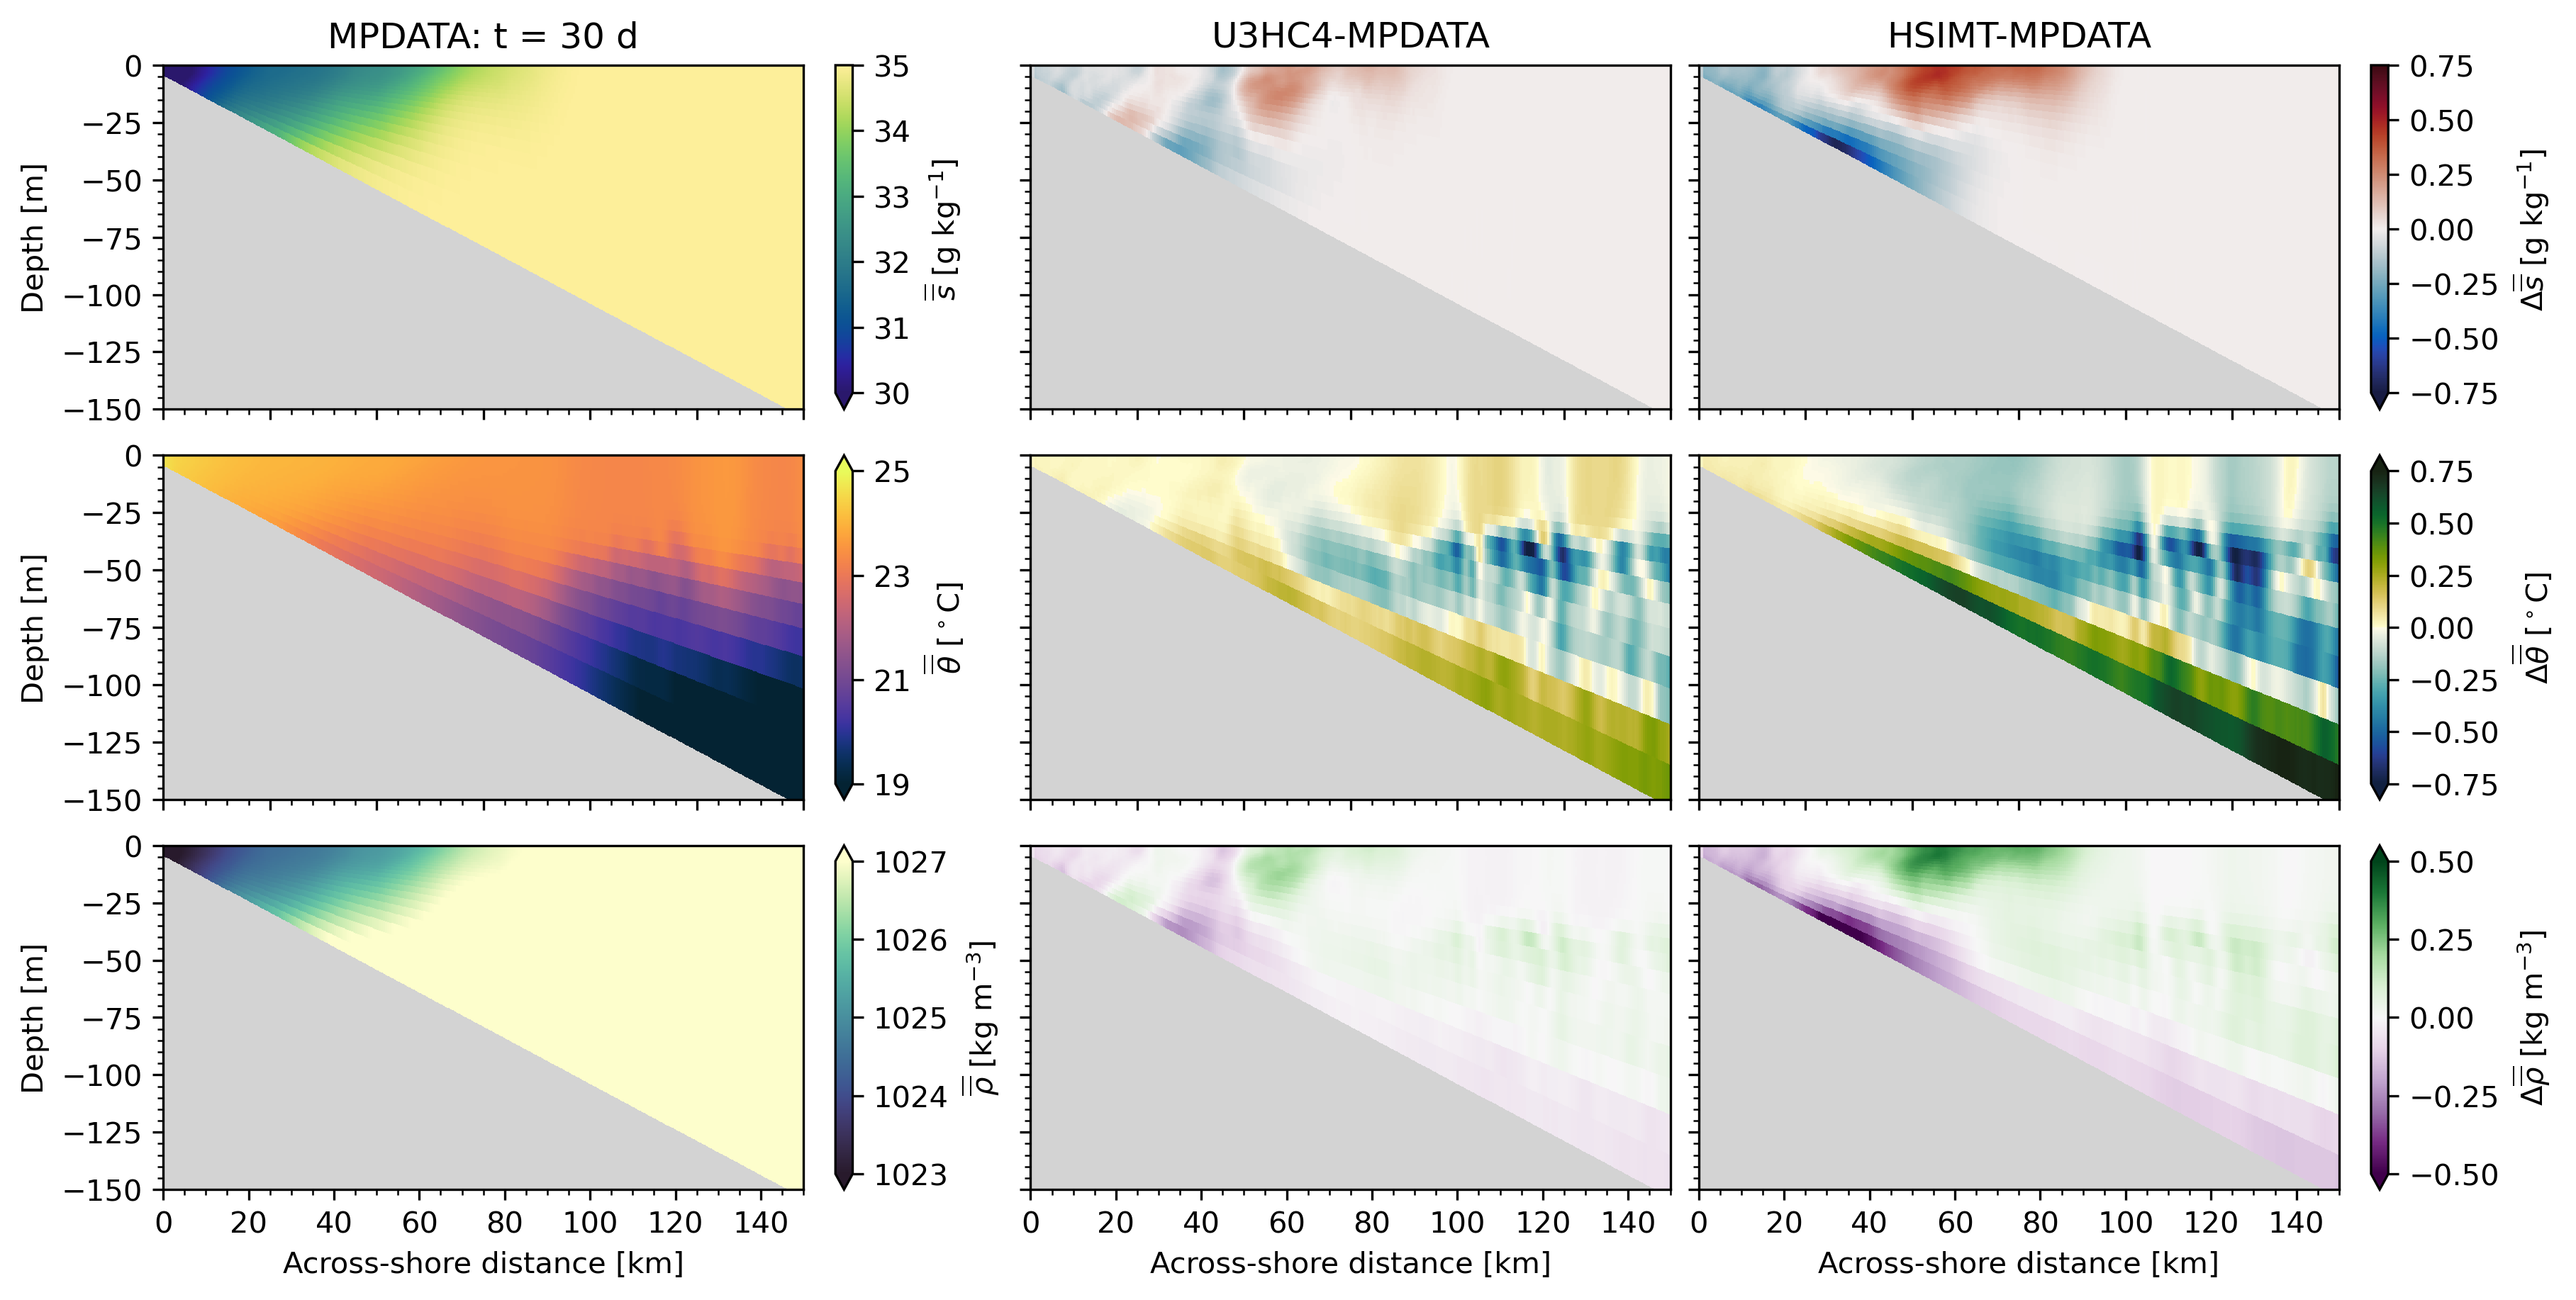

In [18]:
nrows = 3; ncols = 3
fig, ax = plt.subplots(nrows,ncols, figsize = (12,6), 
                       sharey = True, constrained_layout = True, dpi = 300)

#The across-shore coordinate is the same for all simulations, so recycle it as the x input
s = ax[0,0].pcolormesh(smean[0].y_rho, zrho_ens_m, salt_ens_m, cmap = cmo.haline, vmin = 30, vmax = 35)
t = ax[1,0].pcolormesh(tmean[0].y_rho, zrho_ens_m, temp_ens_m, cmap = cmo.thermal, vmin = 19, vmax = 25)
r = ax[2,0].pcolormesh(smean[0].y_rho, zrho_ens_m, rho_ens_m, cmap = cmo.deep_r, vmin = 1023, vmax = 1027)

s1 = ax[0,1].pcolormesh(smean[0].y_rho, zrho_ens_u, salt_ens_u-salt_ens_m, cmap = cmo.balance, vmin = -0.75, vmax = 0.75)
t1 = ax[1,1].pcolormesh(tmean[0].y_rho, zrho_ens_u, temp_ens_u-temp_ens_m, cmap = cmo.delta, vmin = -0.75, vmax = 0.75)
r1 = ax[2,1].pcolormesh(smean[0].y_rho, zrho_ens_u, rho_ens_u-rho_ens_m, cmap = plt.get_cmap('PRGn'), vmin = -0.5, vmax = 0.5)

s2 = ax[0,2].pcolormesh(smean[0].y_rho, zrho_ens_h, salt_ens_h-salt_ens_m, cmap = cmo.balance, vmin = -0.75, vmax = 0.75)
t2 = ax[1,2].pcolormesh(tmean[0].y_rho, zrho_ens_h, temp_ens_h-temp_ens_m, cmap = cmo.delta, vmin = -0.75, vmax = 0.75)
r2 = ax[2,2].pcolormesh(smean[0].y_rho, zrho_ens_h, rho_ens_h-rho_ens_m, cmap = plt.get_cmap('PRGn'), vmin = -0.5, vmax = 0.5)

for i in range(nrows):
    for j in range(ncols):
        ax[i,j].set_xlim(0,150000)
        ax[i,j].set_ylim(-150,0)
        ax[i,j].set_ylabel('Depth [m]')
        ax[i,j].minorticks_on()
        ax[i,j].set_facecolor('lightgray')
        ax[i,j].set_title('')
        ax[i,1].set_ylabel('')
        ax[i,2].set_ylabel('')
        ax[-1,j].set_xlabel('Across-shore distance [km]')
        ax[0,j].set_yticks(np.arange(-150,25,25))
        # zw_mean[-1][0].plot(ax = ax[i,j], x = 'y_rho', c = 'k', lw = 0.85)

for i in range(nrows-1):
    for j in range(ncols):
        ax[i,j].set_xticklabels('')
        ax[i,j].set_xlabel('')
        ax[-1,j].set_xticks([0, 20e3, 40e3, 60e3, 80e3, 100e3, 120e3, 140e3])
        ax[-1,j].set_xticklabels(['0', '20', '40', '60', '80', '100', '120', '140'])
        
ax[0,0].set_title(r'MPDATA: t = 30 d')
ax[0,1].set_title(r'U3HC4-MPDATA')
ax[0,2].set_title(r'HSIMT-MPDATA')

fig.colorbar(s, ax = ax[0,0], extend = 'min', label = r'$\overline{\overline{s}}$ [g kg$^{-1}$]')
fig.colorbar(t, ax = ax[1,0], extend = 'both', ticks = np.arange(19,27,2), label = r'$\overline{\overline{\theta}}$ [$^\circ$C]')
fig.colorbar(r, ax = ax[2,0], extend = 'both', label = r'$\overline{\overline{\rho}}$ [kg m$^{-3}$]')

fig.colorbar(s2, ax = ax[0,2], extend = 'min', ticks = np.arange(-0.75,1,0.25), label = r'$\Delta \overline{\overline{s}}$ [g kg$^{-1}$]')
fig.colorbar(t2, ax = ax[1,2], extend = 'both', ticks = np.arange(-0.75,1,0.25), label = r'$\Delta \overline{\overline{\theta}}$ [$^\circ$C]')
fig.colorbar(r2, ax = ax[2,2], extend = 'both', ticks = np.arange(-0.5,0.75,0.25), label = r'$\Delta \overline{\overline{\rho}}$ [kg m$^{-3}$]')

In [19]:
zmean_all = np.mean([zrho_ens_u,zrho_ens_h, zrho_ens_m], axis = 0)

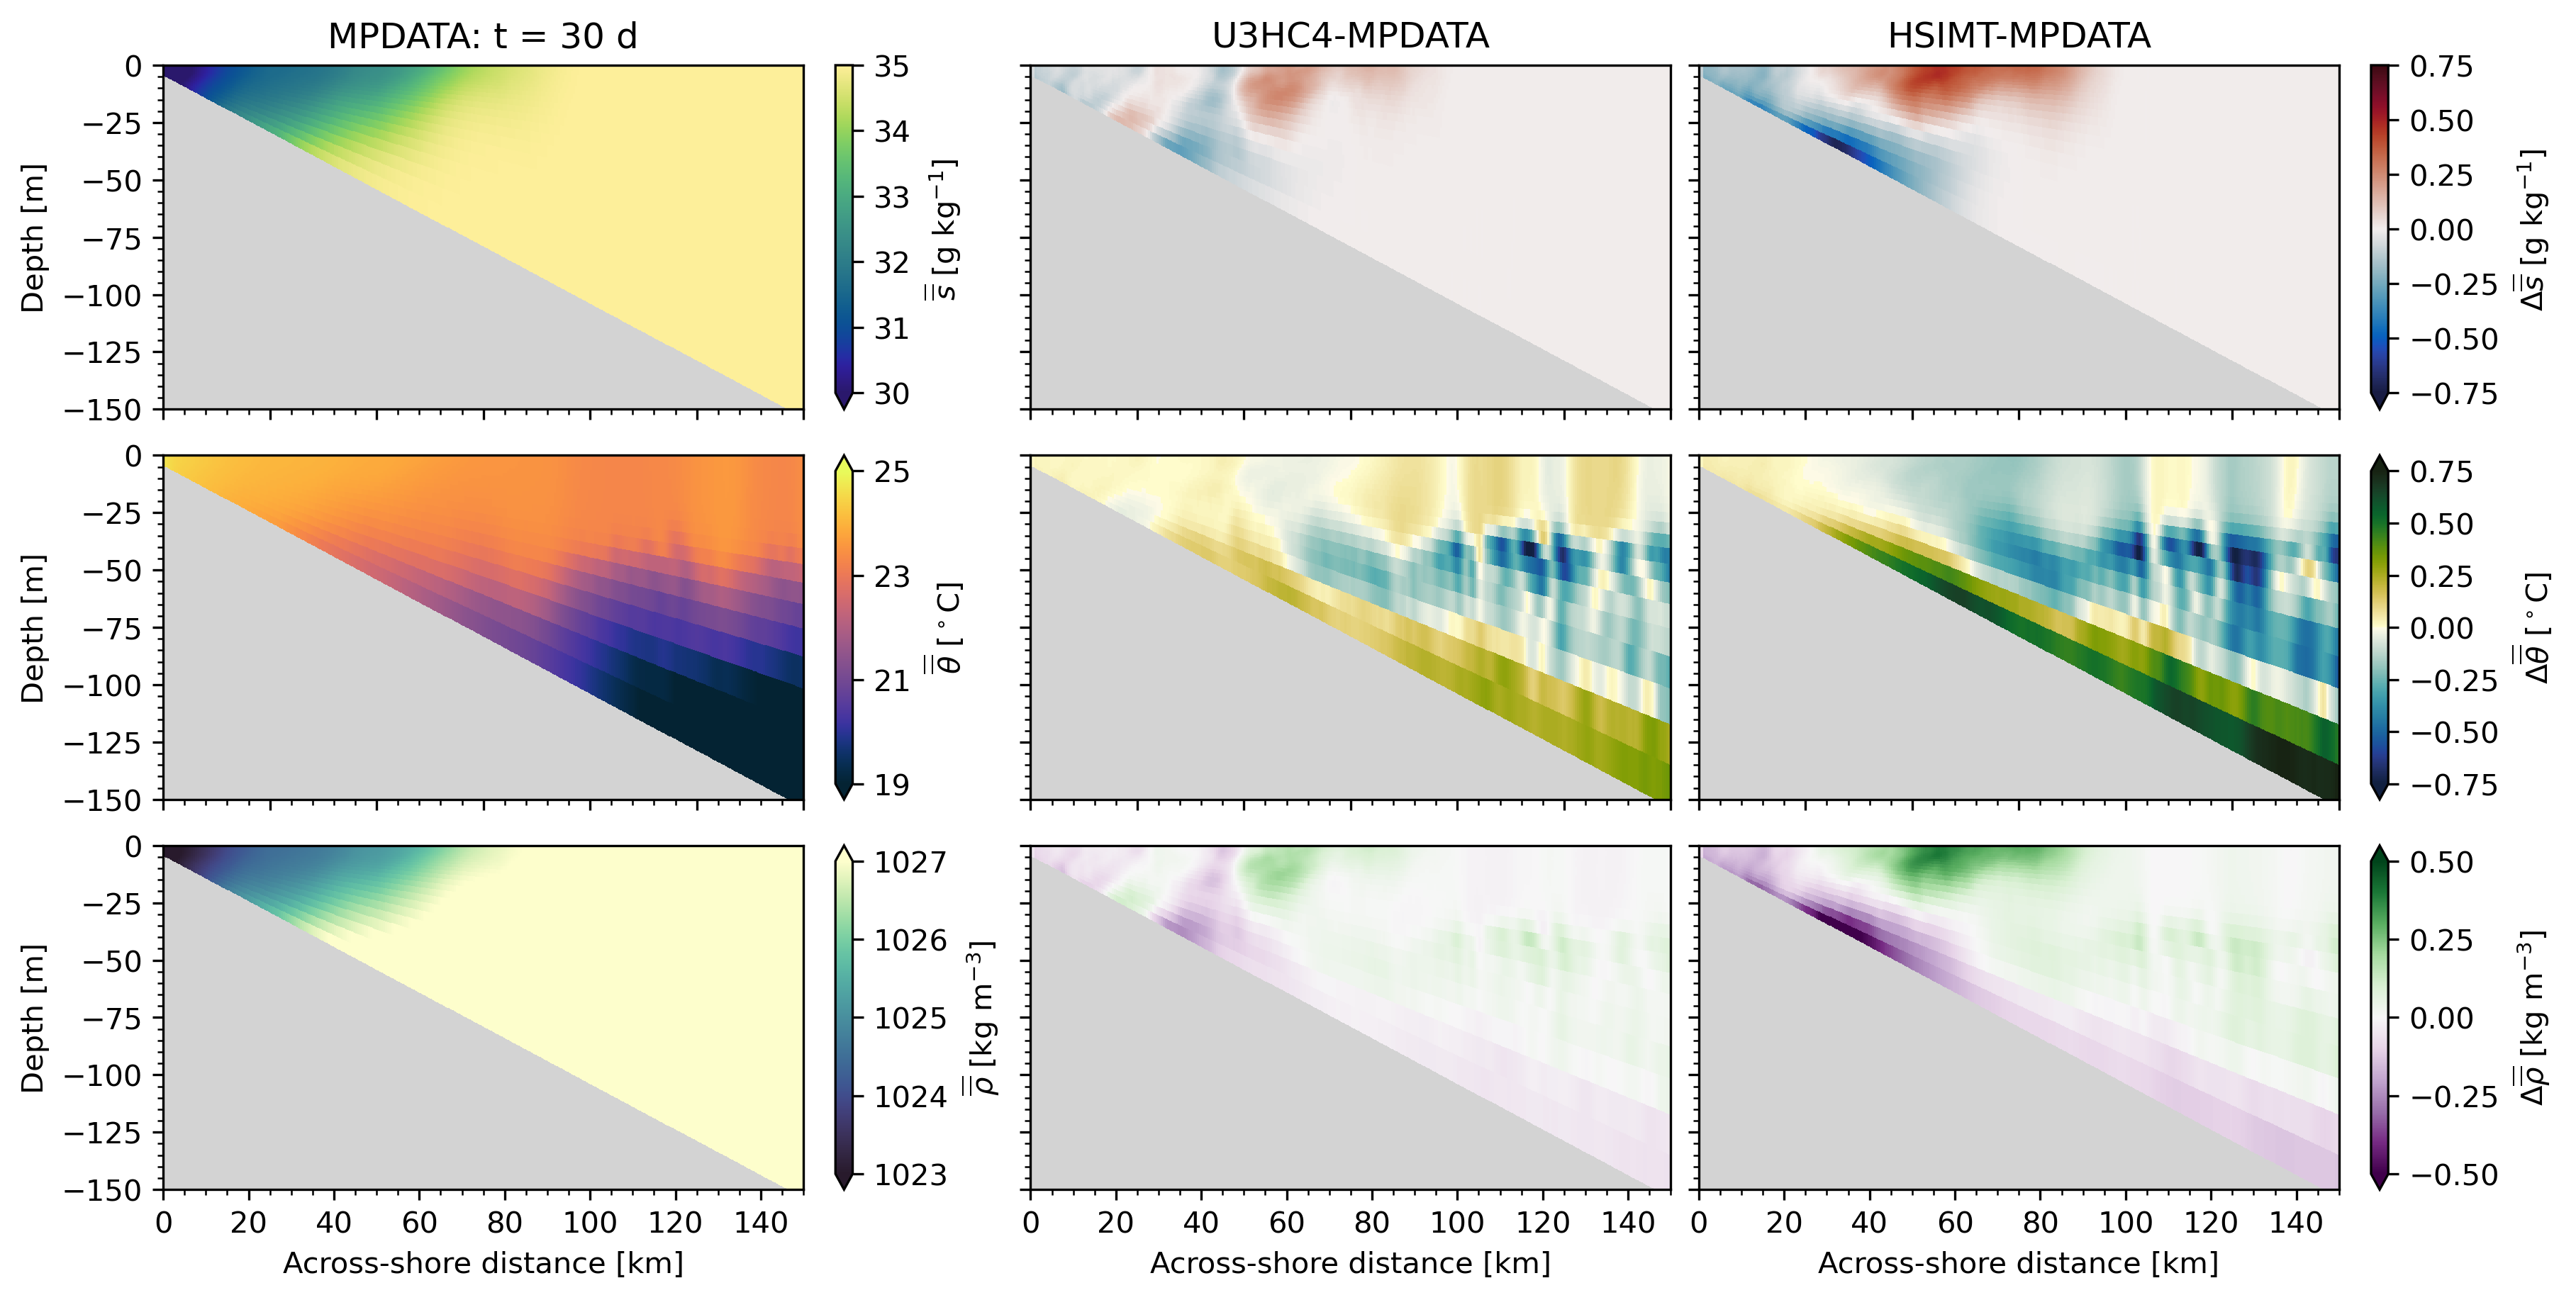

In [20]:
nrows = 3; ncols = 3
fig, ax = plt.subplots(nrows,ncols, figsize = (12,6), 
                       sharey = True, constrained_layout = True, dpi = 300)

#The across-shore coordinate is the same for all simulations, so recycle it as the x input
s = ax[0,0].pcolormesh(smean[0].y_rho, zrho_ens_m, salt_ens_m, cmap = cmo.haline, vmin = 30, vmax = 35)
t = ax[1,0].pcolormesh(tmean[0].y_rho, zrho_ens_m, temp_ens_m, cmap = cmo.thermal, vmin = 19, vmax = 25)
r = ax[2,0].pcolormesh(smean[0].y_rho, zrho_ens_m, rho_ens_m, cmap = cmo.deep_r, vmin = 1023, vmax = 1027)

s1 = ax[0,1].pcolormesh(smean[0].y_rho, zmean_all, salt_ens_u-salt_ens_m, cmap = cmo.balance, vmin = -0.75, vmax = 0.75)
t1 = ax[1,1].pcolormesh(tmean[0].y_rho, zmean_all, temp_ens_u-temp_ens_m, cmap = cmo.delta, vmin = -0.75, vmax = 0.75)
r1 = ax[2,1].pcolormesh(smean[0].y_rho, zmean_all, rho_ens_u-rho_ens_m, cmap = plt.get_cmap('PRGn'), vmin = -0.5, vmax = 0.5)

s2 = ax[0,2].pcolormesh(smean[0].y_rho, zmean_all, salt_ens_h-salt_ens_m, cmap = cmo.balance, vmin = -0.75, vmax = 0.75)
t2 = ax[1,2].pcolormesh(tmean[0].y_rho, zmean_all, temp_ens_h-temp_ens_m, cmap = cmo.delta, vmin = -0.75, vmax = 0.75)
r2 = ax[2,2].pcolormesh(smean[0].y_rho, zmean_all, rho_ens_h-rho_ens_m, cmap = plt.get_cmap('PRGn'), vmin = -0.5, vmax = 0.5)

for i in range(nrows):
    for j in range(ncols):
        ax[i,j].set_xlim(0,150000)
        ax[i,j].set_ylim(-150,0)
        ax[i,j].set_ylabel('Depth [m]')
        ax[i,j].minorticks_on()
        ax[i,j].set_facecolor('lightgray')
        ax[i,j].set_title('')
        ax[i,1].set_ylabel('')
        ax[i,2].set_ylabel('')
        ax[-1,j].set_xlabel('Across-shore distance [km]')
        ax[0,j].set_yticks(np.arange(-150,25,25))
        # zw_mean[-1][0].plot(ax = ax[i,j], x = 'y_rho', c = 'k', lw = 0.85)

for i in range(nrows-1):
    for j in range(ncols):
        ax[i,j].set_xticklabels('')
        ax[i,j].set_xlabel('')
        ax[-1,j].set_xticks([0, 20e3, 40e3, 60e3, 80e3, 100e3, 120e3, 140e3])
        ax[-1,j].set_xticklabels(['0', '20', '40', '60', '80', '100', '120', '140'])
        
ax[0,0].set_title(r'MPDATA: t = 30 d')
ax[0,1].set_title(r'U3HC4-MPDATA')
ax[0,2].set_title(r'HSIMT-MPDATA')

fig.colorbar(s, ax = ax[0,0], extend = 'min', label = r'$\overline{\overline{s}}$ [g kg$^{-1}$]')
fig.colorbar(t, ax = ax[1,0], extend = 'both', ticks = np.arange(19,27,2), label = r'$\overline{\overline{\theta}}$ [$^\circ$C]')
fig.colorbar(r, ax = ax[2,0], extend = 'both', label = r'$\overline{\overline{\rho}}$ [kg m$^{-3}$]')

fig.colorbar(s2, ax = ax[0,2], extend = 'min', ticks = np.arange(-0.75,1,0.25), label = r'$\Delta \overline{\overline{s}}$ [g kg$^{-1}$]')
fig.colorbar(t2, ax = ax[1,2], extend = 'both', ticks = np.arange(-0.75,1,0.25), label = r'$\Delta \overline{\overline{\theta}}$ [$^\circ$C]')
fig.colorbar(r2, ax = ax[2,2], extend = 'both', ticks = np.arange(-0.5,0.75,0.25), label = r'$\Delta \overline{\overline{\rho}}$ [kg m$^{-3}$]')

# ax[0,0].text(5e3,)

# plt.savefig('tadv_cs_day30.png', dpi = 500)

### Wow - let's summarize what we're seeing
> - HSIMT clearly has larger differences in $s$, $\theta$, and $\rho$
> - HSIMT has a warmer temp. bias near the bottom - numerical mixing must be driving it because the physical mixing is weaker, assuming the trends are comparable for salinity
> > - This causes less stratification relative to MPDATA near the bottom, therefore less APE 
> - We're indirectly showing the importance of vertical resolution. 

### Repeat this analysis, but try at day 7.5. Then average over the last 5 days 

In [21]:
dsm[0].ocean_time[156].values

array(cftime.DatetimeProlepticGregorian(1, 1, 7, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [22]:
def alongshore_mean(ds, xislice, tidx):
    zrhomean = ds.z_rho.isel(xi_rho = xislice).mean('xi_rho')[tidx]

    smean = ds.salt.isel(xi_rho = xislice).mean('xi_rho')[tidx]
    smean = smean.assign_coords({'y_rho': ds.y_rho[:,0], 'z_rho':zrhomean})

    tmean = ds.temp.isel(xi_rho = xislice).mean('xi_rho')[tidx]
    tmean = tmean.assign_coords({'y_rho': ds.y_rho[:,0], 'z_rho':zrhomean})

    rhol = 1027*((1+7.6*(10**-4*(ds.salt-35)))-1.7*10**-4*(ds.temp-25))
    rhomean = rhol.isel(xi_rho = xislice).mean('xi_rho')[tidx]
    rhomean = rhomean.assign_coords({'y_rho': ds.y_rho[:,0], 'z_rho':zrhomean})
    
    return zrhomean, smean, tmean, rhomean

tidx = 156
z_m = []
z_u = []
z_h = []
salt_m = []
salt_u = []
salt_h = []
temp_m = []
temp_u = []
temp_h = []
rho_m = []
rho_u = []
rho_h = []
for i in range(len(paths_h)):
    zrhom,saltm,tempm,rhom = alongshore_mean(dsm[i], xislice, tidx)
    zrhou,saltu,tempu,rhou = alongshore_mean(dsu[i], xislice, tidx)
    zrhoh,salth,temph,rhoh = alongshore_mean(dsh[i], xislice, tidx)
    
    z_m.append(zrhom)
    z_u.append(zrhou)
    z_h.append(zrhoh)
    
    salt_m.append(saltm)
    salt_u.append(saltu)
    salt_h.append(salth)
    
    temp_m.append(tempm)
    temp_u.append(tempu)
    temp_h.append(temph)
    
    rho_m.append(rhom)
    rho_u.append(rhou)
    rho_h.append(rhoh)

salt_m = np.array([salt_m[0], salt_m[1], salt_m[2], salt_m[3], salt_m[4], salt_m[5], salt_m[6], salt_m[7]])
temp_m = np.array([temp_m[0], temp_m[1], temp_m[2], temp_m[3], temp_m[4], temp_m[5], temp_m[6], temp_m[7]])
rho_m = np.array([rho_m[0], rho_m[1], rho_m[2], rho_m[3], rho_m[4], rho_m[5], rho_m[6], rho_m[7]])
zrho_m = np.array([z_m[0], z_m[1], z_m[2], z_m[3], z_m[4], z_m[5], z_m[6], z_m[7]])

salt_u = np.array([salt_u[0], salt_u[1], salt_u[2], salt_u[3], salt_u[4], salt_u[5], salt_u[6], salt_u[7]])
temp_u = np.array([temp_u[0], temp_u[1], temp_u[2], temp_u[3], temp_u[4], temp_u[5], temp_u[6], temp_u[7]])
rho_u = np.array([rho_u[0], rho_u[1], rho_u[2], rho_u[3], rho_u[4], rho_u[5], rho_u[6], rho_u[7]])
zrho_u = np.array([z_u[0], z_u[1], z_u[2], z_u[3], z_u[4], z_u[5], z_u[6], z_u[7]])

salt_h = np.array([salt_h[0], salt_h[1], salt_h[2], salt_h[3], salt_h[4], salt_h[5], salt_h[6], salt_h[7]])
temp_h = np.array([temp_h[0], temp_h[1], temp_h[2], temp_h[3], temp_h[4], temp_h[5], temp_h[6], temp_h[7]])
rho_h = np.array([rho_h[0], rho_h[1], rho_h[2], rho_h[3], rho_h[4], rho_h[5], rho_h[6], rho_h[7]])
zrho_h = np.array([z_h[0], z_h[1], z_h[2], z_h[3], z_h[4], z_h[5], z_h[6], z_h[7]])

salt_ens_m = salt_m.mean(axis = 0)
temp_ens_m = temp_m.mean(axis = 0)
rho_ens_m = rho_m.mean(axis = 0)
zrho_ens_m = zrho_m.mean(axis = 0)

salt_ens_u = salt_u.mean(axis = 0)
temp_ens_u = temp_u.mean(axis = 0)
rho_ens_u = rho_u.mean(axis = 0)
zrho_ens_u = zrho_u.mean(axis = 0)

salt_ens_h = salt_h.mean(axis = 0)
temp_ens_h = temp_h.mean(axis = 0)
rho_ens_h = rho_h.mean(axis = 0)
zrho_ens_h = zrho_h.mean(axis = 0)

zmean_all = np.mean([zrho_ens_u,zrho_ens_h, zrho_ens_m], axis = 0)

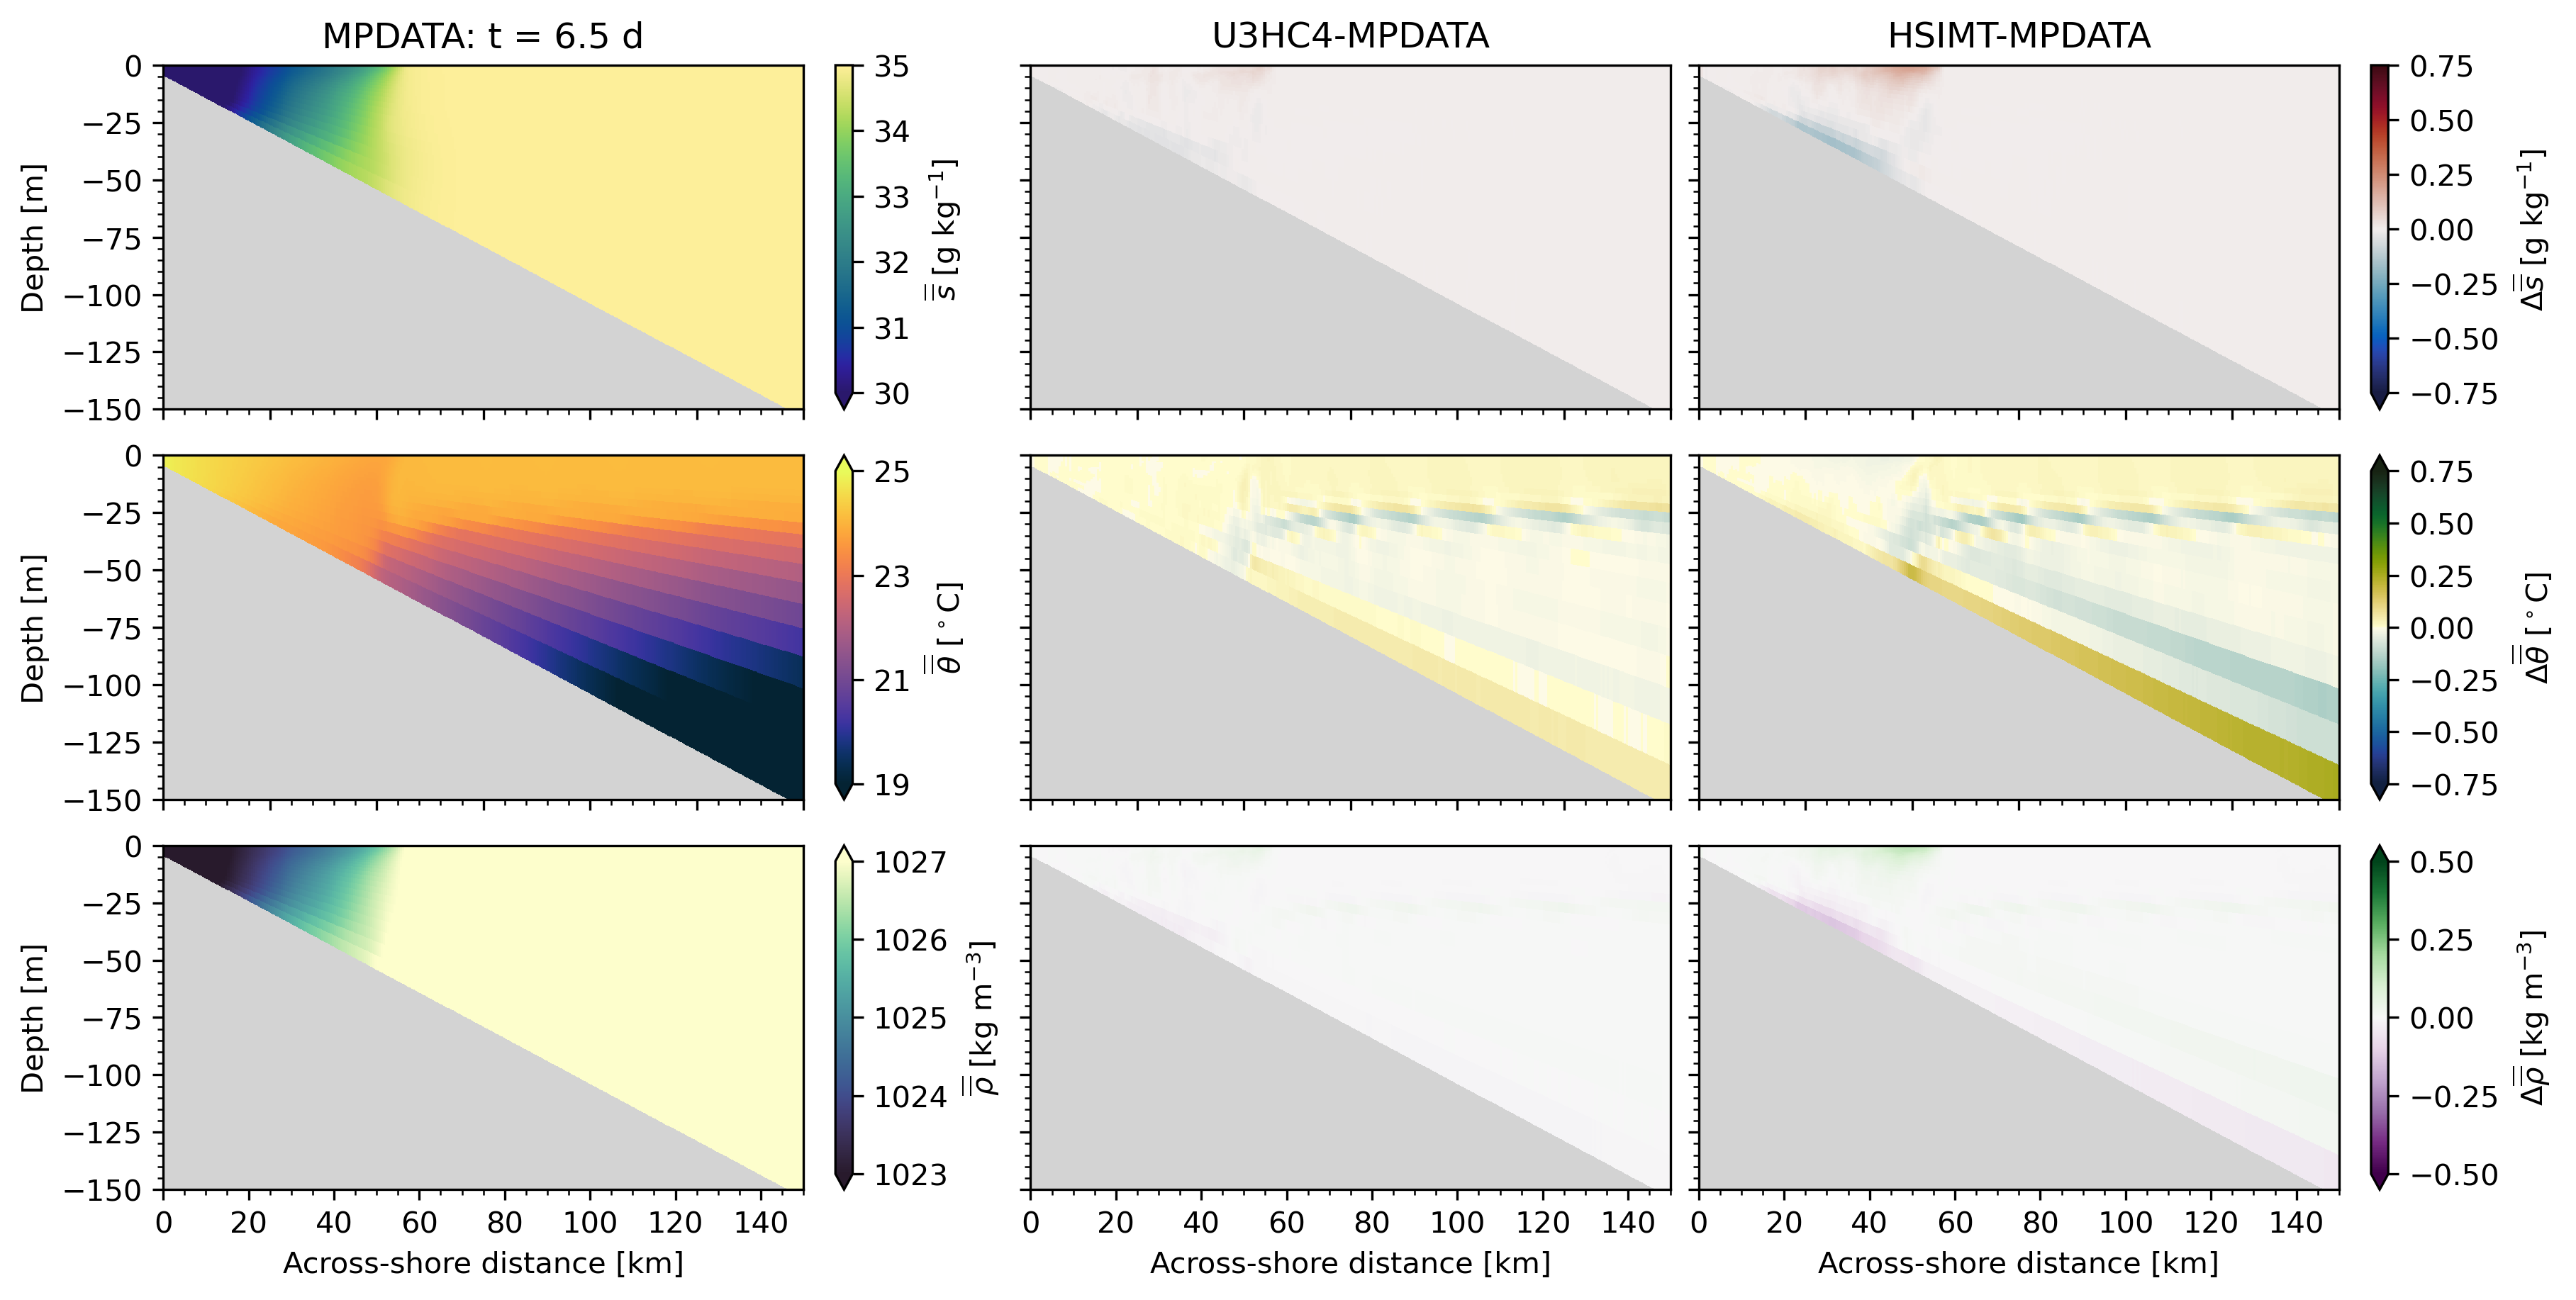

In [23]:
nrows = 3; ncols = 3
fig, ax = plt.subplots(nrows,ncols, figsize = (12,6), 
                       sharey = True, constrained_layout = True, dpi = 300)

#The across-shore coordinate is the same for all simulations, so recycle it as the x input
s = ax[0,0].pcolormesh(smean[0].y_rho, zrho_ens_m, salt_ens_m, cmap = cmo.haline, vmin = 30, vmax = 35)
t = ax[1,0].pcolormesh(tmean[0].y_rho, zrho_ens_m, temp_ens_m, cmap = cmo.thermal, vmin = 19, vmax = 25)
r = ax[2,0].pcolormesh(smean[0].y_rho, zrho_ens_m, rho_ens_m, cmap = cmo.deep_r, vmin = 1023, vmax = 1027)

s1 = ax[0,1].pcolormesh(smean[0].y_rho, zmean_all, salt_ens_u-salt_ens_m, cmap = cmo.balance, vmin = -0.75, vmax = 0.75)
t1 = ax[1,1].pcolormesh(tmean[0].y_rho, zmean_all, temp_ens_u-temp_ens_m, cmap = cmo.delta, vmin = -0.75, vmax = 0.75)
r1 = ax[2,1].pcolormesh(smean[0].y_rho, zmean_all, rho_ens_u-rho_ens_m, cmap = plt.get_cmap('PRGn'), vmin = -0.5, vmax = 0.5)

s2 = ax[0,2].pcolormesh(smean[0].y_rho, zmean_all, salt_ens_h-salt_ens_m, cmap = cmo.balance, vmin = -0.75, vmax = 0.75)
t2 = ax[1,2].pcolormesh(tmean[0].y_rho, zmean_all, temp_ens_h-temp_ens_m, cmap = cmo.delta, vmin = -0.75, vmax = 0.75)
r2 = ax[2,2].pcolormesh(smean[0].y_rho, zmean_all, rho_ens_h-rho_ens_m, cmap = plt.get_cmap('PRGn'), vmin = -0.5, vmax = 0.5)

for i in range(nrows):
    for j in range(ncols):
        ax[i,j].set_xlim(0,150000)
        ax[i,j].set_ylim(-150,0)
        ax[i,j].set_ylabel('Depth [m]')
        ax[i,j].minorticks_on()
        ax[i,j].set_facecolor('lightgray')
        ax[i,j].set_title('')
        ax[i,1].set_ylabel('')
        ax[i,2].set_ylabel('')
        ax[-1,j].set_xlabel('Across-shore distance [km]')
        ax[0,j].set_yticks(np.arange(-150,25,25))
        # zw_mean[-1][0].plot(ax = ax[i,j], x = 'y_rho', c = 'k', lw = 0.85)

for i in range(nrows-1):
    for j in range(ncols):
        ax[i,j].set_xticklabels('')
        ax[i,j].set_xlabel('')
        ax[-1,j].set_xticks([0, 20e3, 40e3, 60e3, 80e3, 100e3, 120e3, 140e3])
        ax[-1,j].set_xticklabels(['0', '20', '40', '60', '80', '100', '120', '140'])
        
ax[0,0].set_title(r'MPDATA: t = 6.5 d')
ax[0,1].set_title(r'U3HC4-MPDATA')
ax[0,2].set_title(r'HSIMT-MPDATA')

fig.colorbar(s, ax = ax[0,0], extend = 'min', label = r'$\overline{\overline{s}}$ [g kg$^{-1}$]')
fig.colorbar(t, ax = ax[1,0], extend = 'both', ticks = np.arange(19,27,2), label = r'$\overline{\overline{\theta}}$ [$^\circ$C]')
fig.colorbar(r, ax = ax[2,0], extend = 'both', label = r'$\overline{\overline{\rho}}$ [kg m$^{-3}$]')

fig.colorbar(s2, ax = ax[0,2], extend = 'min', ticks = np.arange(-0.75,1,0.25), label = r'$\Delta \overline{\overline{s}}$ [g kg$^{-1}$]')
fig.colorbar(t2, ax = ax[1,2], extend = 'both', ticks = np.arange(-0.75,1,0.25), label = r'$\Delta \overline{\overline{\theta}}$ [$^\circ$C]')
fig.colorbar(r2, ax = ax[2,2], extend = 'both', ticks = np.arange(-0.5,0.75,0.25), label = r'$\Delta \overline{\overline{\rho}}$ [kg m$^{-3}$]')

# ax[0,0].text(5e3,)

# plt.savefig('tadv_cs_day6pt5.png', dpi = 500)

### Only show salt at days 6.5 and day 30 

In [24]:
def alongshore_mean(ds, xislice, tidx):
    zrhomean = ds.z_rho.isel(xi_rho = xislice).mean('xi_rho')[tidx]

    smean = ds.salt.isel(xi_rho = xislice).mean('xi_rho')[tidx]
    smean = smean.assign_coords({'y_rho': ds.y_rho[:,0], 'z_rho':zrhomean})

    tmean = ds.temp.isel(xi_rho = xislice).mean('xi_rho')[tidx]
    tmean = tmean.assign_coords({'y_rho': ds.y_rho[:,0], 'z_rho':zrhomean})

    rhol = 1027*((1+7.6*(10**-4*(ds.salt-35)))-1.7*10**-4*(ds.temp-25))
    rhomean = rhol.isel(xi_rho = xislice).mean('xi_rho')[tidx]
    rhomean = rhomean.assign_coords({'y_rho': ds.y_rho[:,0], 'z_rho':zrhomean})
    
    return zrhomean, smean, tmean, rhomean

tidx = 156
salt_m = []
salt_u = []
salt_h = []
for i in range(len(paths_h)):
    _,saltm,_,_ = alongshore_mean(dsm[i], xislice, tidx)
    _,saltu,_,_ = alongshore_mean(dsu[i], xislice, tidx)
    _,salth,_,_ = alongshore_mean(dsh[i], xislice, tidx)
    
    salt_m.append(saltm)
    salt_u.append(saltu)
    salt_h.append(salth)
    

salt_m = np.array([salt_m[0], salt_m[1], salt_m[2], salt_m[3], salt_m[4], salt_m[5], salt_m[6], salt_m[7]])
salt_u = np.array([salt_u[0], salt_u[1], salt_u[2], salt_u[3], salt_u[4], salt_u[5], salt_u[6], salt_u[7]])
salt_h = np.array([salt_h[0], salt_h[1], salt_h[2], salt_h[3], salt_h[4], salt_h[5], salt_h[6], salt_h[7]])

salt_ens_m = salt_m.mean(axis = 0)
salt_ens_u = salt_u.mean(axis = 0)
salt_ens_h = salt_h.mean(axis = 0)

In [25]:
tidx = -1
salt_m_30 = []
salt_u_30= []
salt_h_30 = []
for i in range(len(paths_h)):
    zrhom,saltm,tempm,rhom = alongshore_mean(dsm[i], xislice, tidx)
    zrhou,saltu,tempu,rhou = alongshore_mean(dsu[i], xislice, tidx)
    zrhoh,salth,temph,rhoh = alongshore_mean(dsh[i], xislice, tidx)
    
    salt_m_30.append(saltm)
    salt_u_30.append(saltu)
    salt_h_30.append(salth)
    

salt_m_30 = np.array([salt_m_30[0], salt_m_30[1], salt_m_30[2], salt_m_30[3], salt_m_30[4], salt_m_30[5], salt_m_30[6], salt_m_30[7]])
salt_u_30 = np.array([salt_u_30[0], salt_u_30[1], salt_u_30[2], salt_u_30[3], salt_u_30[4], salt_u_30[5], salt_u_30[6], salt_u_30[7]])
salt_h_30 = np.array([salt_h_30[0], salt_h_30[1], salt_h_30[2], salt_h_30[3], salt_h_30[4], salt_h_30[5], salt_h_30[6], salt_h_30[7]])

salt_ens_m_30 = salt_m_30.mean(axis = 0)
salt_ens_u_30 = salt_u_30.mean(axis = 0)
salt_ens_h_30 = salt_h_30.mean(axis = 0)

In [26]:
smean[0]

<xarray.DataArray 'salt' (s_rho: 30, eta_rho: 389)>
dask.array<getitem, shape=(30, 389), dtype=float32, chunksize=(30, 389), chunktype=numpy.ndarray>
Coordinates:
  * s_rho       (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
    ocean_time  object 0001-01-01 00:00:00
  * eta_rho     (eta_rho) int64 0 1 2 3 4 5 6 7 ... 382 383 384 385 386 387 388
    x_rho       (eta_rho) float64 dask.array<chunksize=(389,), meta=np.ndarray>
    xi_rho      int64 0
    y_rho       (eta_rho) float64 dask.array<chunksize=(389,), meta=np.ndarray>
    z_rho       (s_rho, eta_rho) float64 dask.array<chunksize=(30, 389), meta=np.ndarray>
Attributes:
    long_name:  salinity
    time:       ocean_time
    grid:       <xgcm.Grid>\nX Axis (not periodic, boundary=None):\n  * cente...
    location:   face
    field:      salinity, scalar, series

In [27]:
print(np.max(salt_ens_h_30-salt_ens_m_30))
print(np.min(salt_ens_h_30-salt_ens_m_30))

0.48139572
-0.7133293


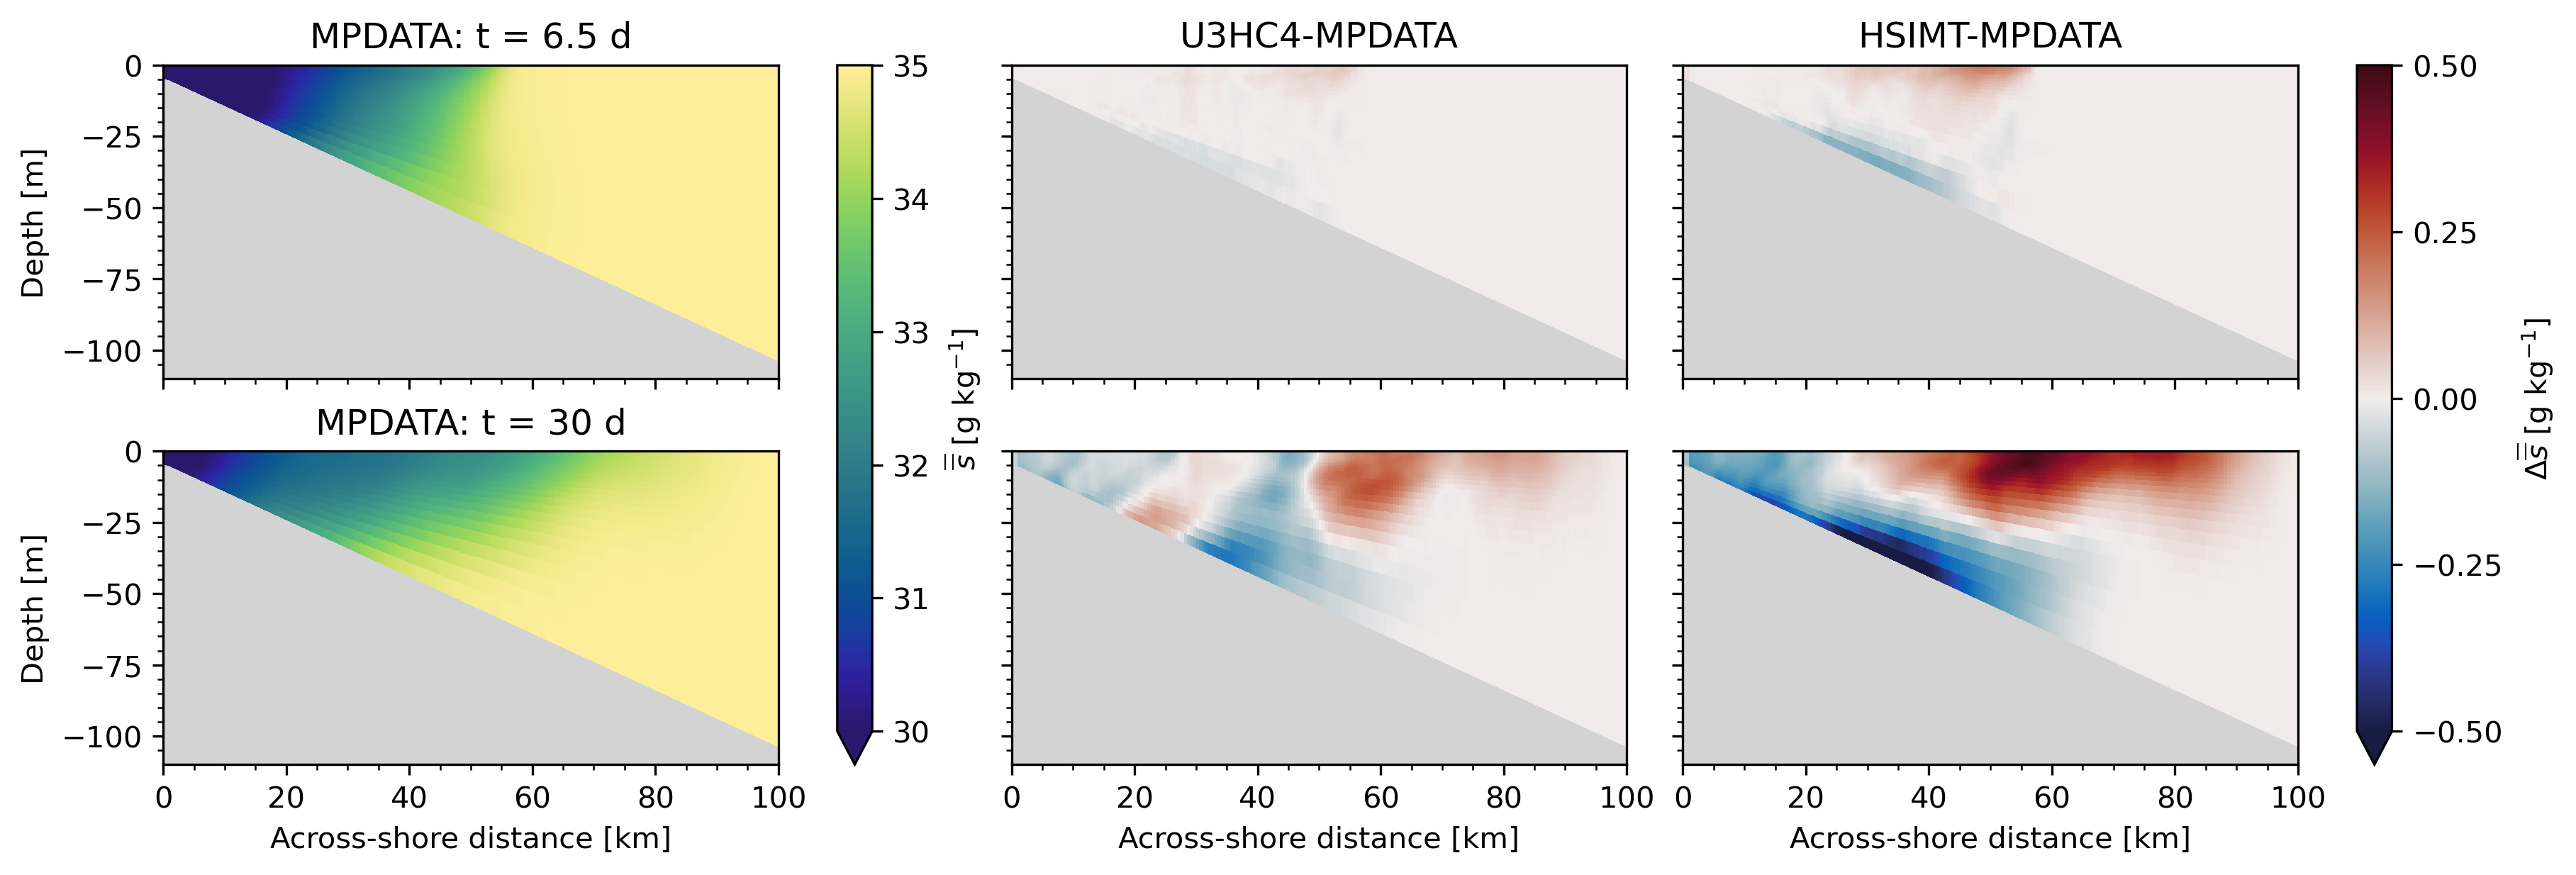

In [28]:
nrows = 2; ncols = 3
fig, ax = plt.subplots(nrows,ncols, figsize = (12,4), 
                       sharey = True, constrained_layout = True, dpi = 300)

#The across-shore coordinate is the same for all simulations, so recycle it as the x input
s = ax[0,0].pcolormesh(smean[0].y_rho, zrho_ens_m, salt_ens_m, cmap = cmo.haline, vmin = 30, vmax = 35)
s1 = ax[0,1].pcolormesh(smean[0].y_rho, zmean_all, salt_ens_u-salt_ens_m, cmap = cmo.balance, vmin = -0.5, vmax = 0.5)
s2 = ax[0,2].pcolormesh(smean[0].y_rho, zmean_all, salt_ens_h-salt_ens_m, cmap = cmo.balance, vmin = -0.5, vmax = 0.5)

s11 = ax[1,0].pcolormesh(smean[0].y_rho, zrho_ens_m, salt_ens_m_30, cmap = cmo.haline, vmin = 30, vmax = 35)
s12 = ax[1,1].pcolormesh(smean[0].y_rho, zmean_all, salt_ens_u_30-salt_ens_m_30, cmap = cmo.balance, vmin = -0.5, vmax = 0.5)
s13 = ax[1,2].pcolormesh(smean[0].y_rho, zmean_all, salt_ens_h_30-salt_ens_m_30, cmap = cmo.balance, vmin = -0.5, vmax = 0.5)


for i in range(nrows):
    for j in range(ncols):
        ax[i,j].set_xlim(0,100000)
        ax[i,j].set_ylim(-110,0)
        ax[i,j].set_ylabel('Depth [m]')
        ax[i,j].minorticks_on()
        ax[i,j].set_facecolor('lightgray')
        ax[i,j].set_title('')
        ax[i,1].set_ylabel('')
        ax[i,2].set_ylabel('')
        ax[-1,j].set_xlabel('Across-shore distance [km]')
        # ax[0,j].set_yticks(np.arange(-150,25,25))
        # zw_mean[-1][0].plot(ax = ax[i,j], x = 'y_rho', c = 'k', lw = 0.85)

for i in range(nrows-1):
    for j in range(ncols):
        ax[i,j].set_xticklabels('')
        ax[i,j].set_xlabel('')
        ax[-1,j].set_xticks([0, 20e3, 40e3, 60e3, 80e3, 100e3])
        ax[-1,j].set_xticklabels(['0', '20', '40', '60', '80', '100'])
        
ax[0,0].set_title(r'MPDATA: t = 6.5 d')
ax[1,0].set_title(r'MPDATA: t = 30 d')
ax[0,1].set_title(r'U3HC4-MPDATA')
ax[0,2].set_title(r'HSIMT-MPDATA')

fig.colorbar(s, ax = ax[:,0], extend = 'min', label = r'$\overline{\overline{s}}$ [g kg$^{-1}$]')
fig.colorbar(s2, ax = ax[:,2], extend = 'min', ticks = np.arange(-0.75,1,0.25), label = r'$\Delta \overline{\overline{s}}$ [g kg$^{-1}$]')

ax[0,0].text(2e3, -100, '(a)', fontweight='bold')
ax[1,0].text(2e3, -100, '(b)', fontweight='bold')

ax[0,1].text(2e3, -100, '(c)', fontweight='bold')
ax[1,1].text(2e3, -100, '(d)', fontweight='bold')

ax[0,2].text(2e3, -100, '(e)', fontweight='bold')
ax[1,2].text(2e3, -100, '(f)', fontweight='bold')

plt.savefig('tadv_cs_salt.png', dpi = 500)

### Need to redo for the manuscript - aspect ratio doesn't work. Make it a 3X2

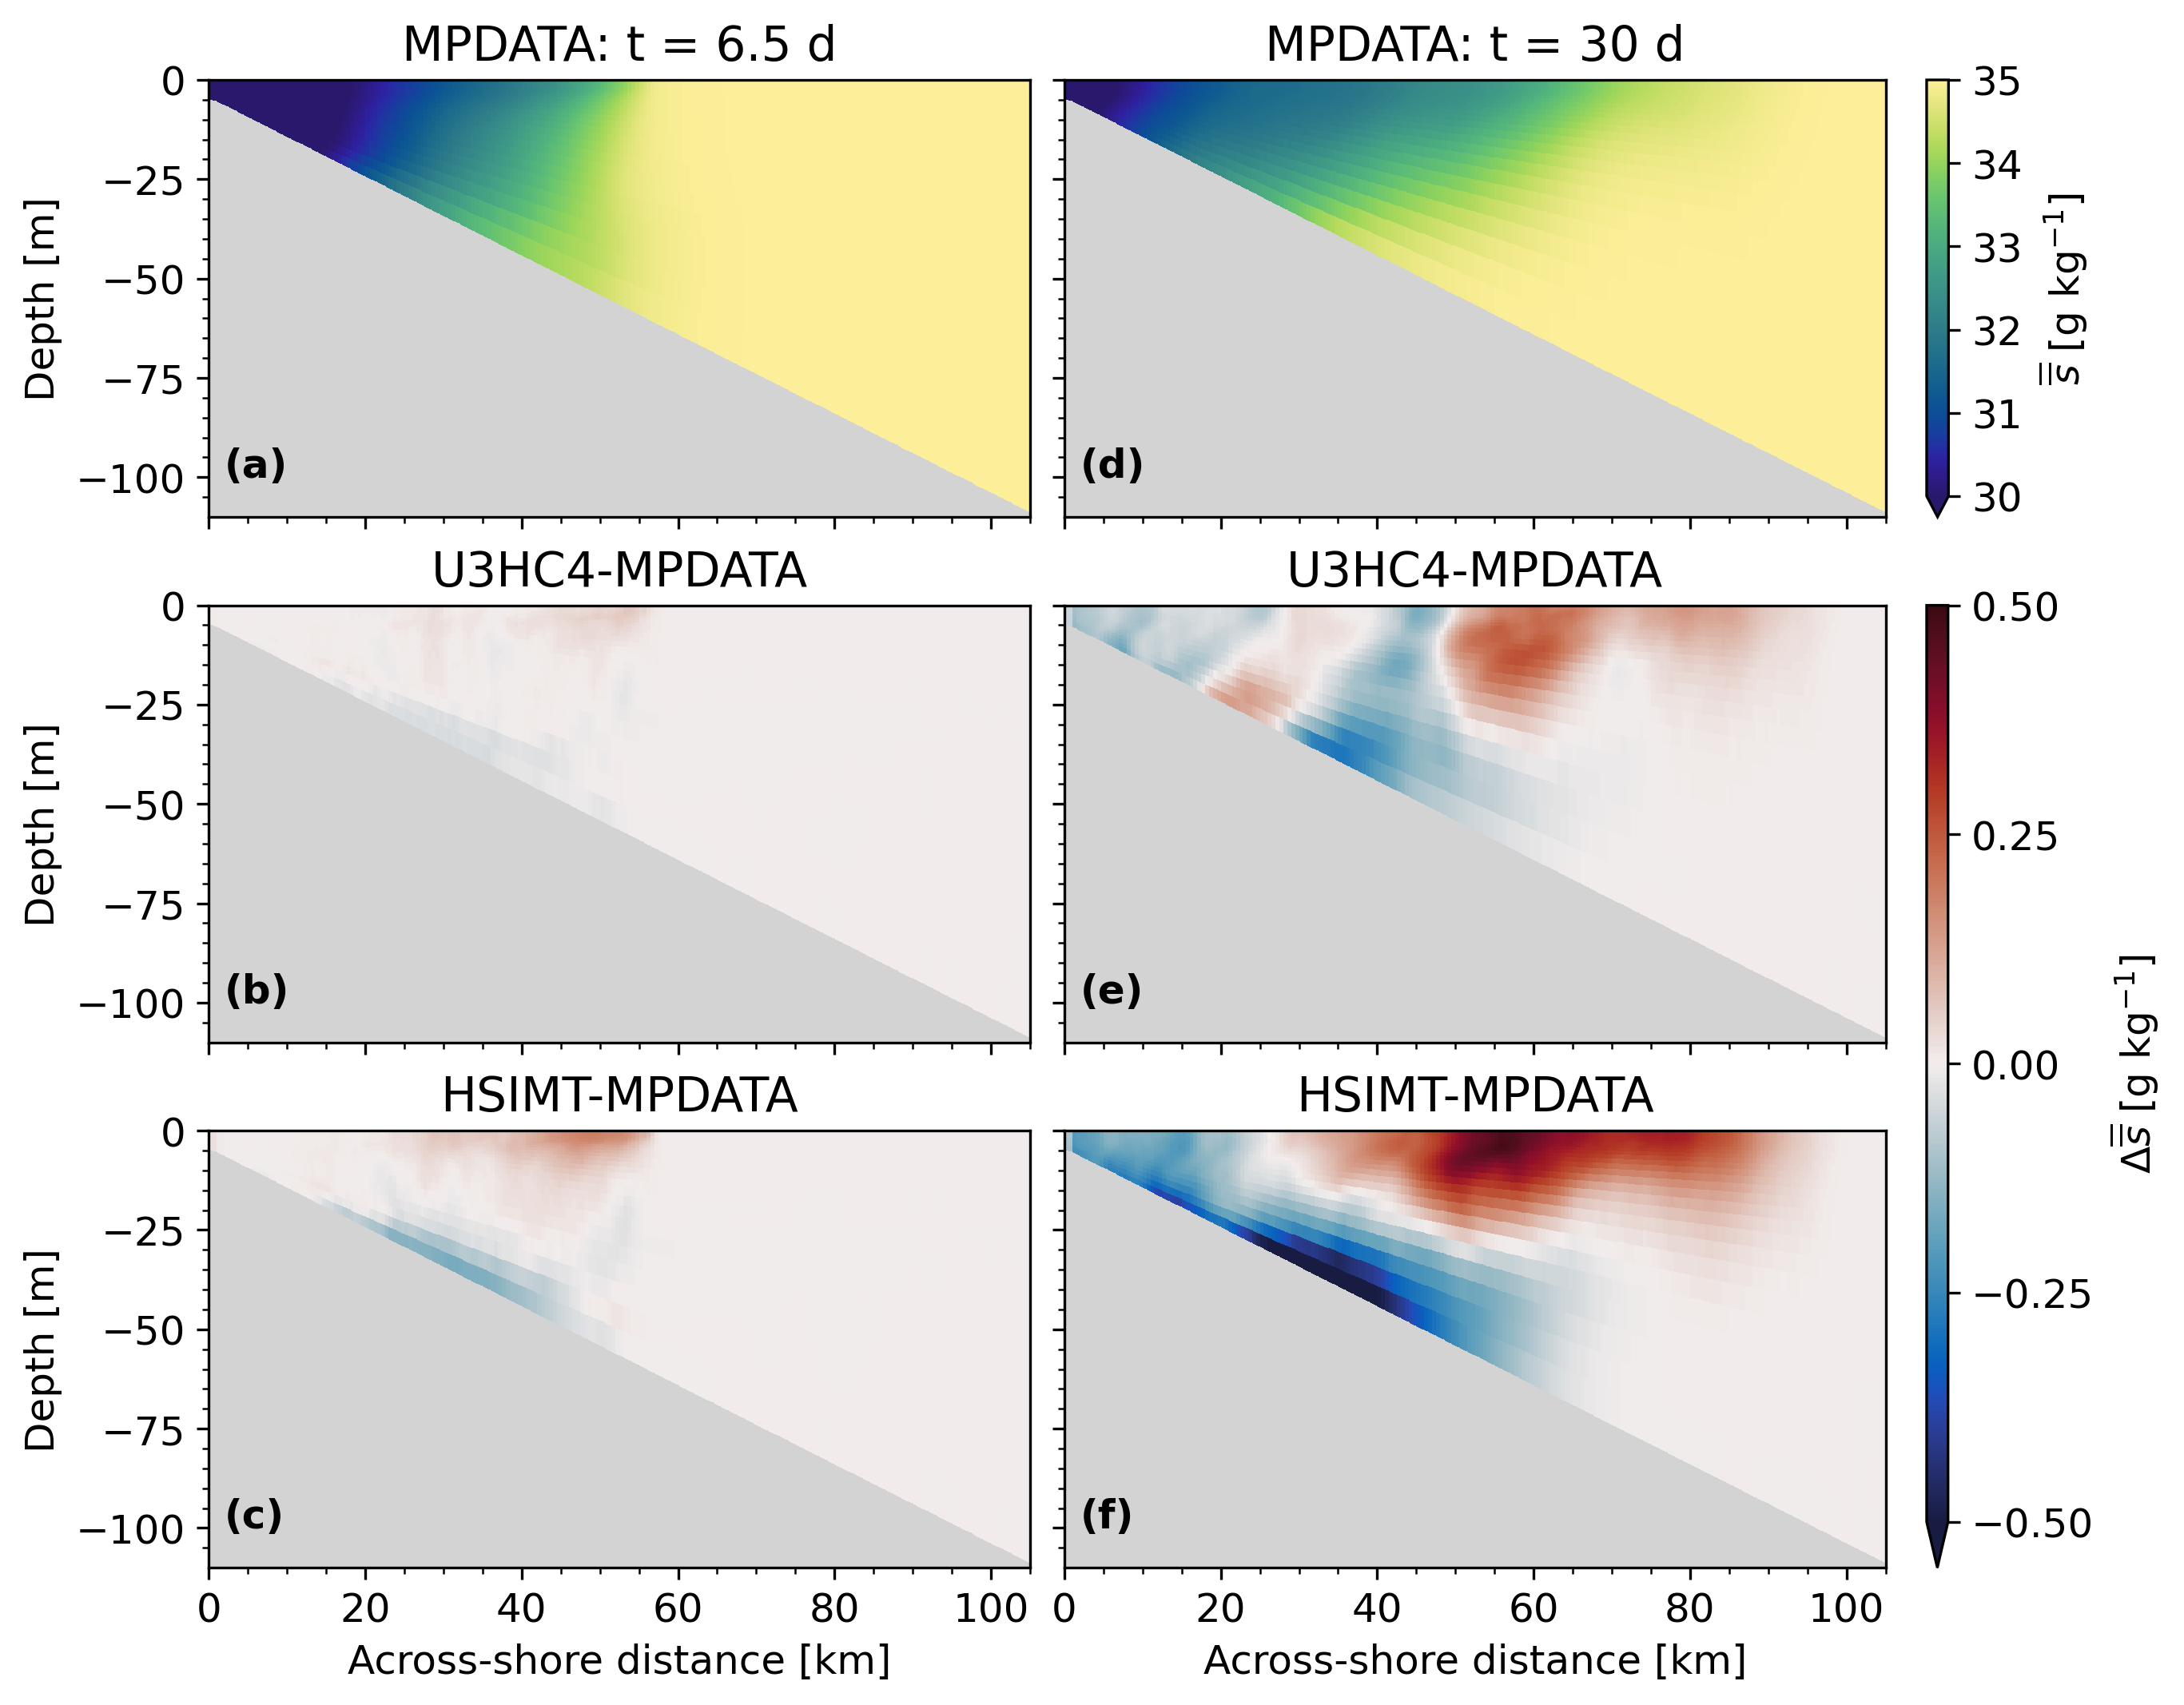

In [54]:
plt.rcParams.update({'font.size': 12})

nrows = 3; ncols = 2
fig, ax = plt.subplots(nrows,ncols, figsize = (9,7), 
                       sharey = True, constrained_layout = True, dpi = 300)

#The across-shore coordinate is the same for all simulations, so recycle it as the x input
s = ax[0,0].pcolormesh(smean[0].y_rho, zrho_ens_m, salt_ens_m, cmap = cmo.haline, vmin = 30, vmax = 35)
s1 = ax[1,0].pcolormesh(smean[0].y_rho, zmean_all, salt_ens_u-salt_ens_m, cmap = cmo.balance, vmin = -0.5, vmax = 0.5)
s2 = ax[2,0].pcolormesh(smean[0].y_rho, zmean_all, salt_ens_h-salt_ens_m, cmap = cmo.balance, vmin = -0.5, vmax = 0.5)

s11 = ax[0,1].pcolormesh(smean[0].y_rho, zrho_ens_m, salt_ens_m_30, cmap = cmo.haline, vmin = 30, vmax = 35)
s12 = ax[1,1].pcolormesh(smean[0].y_rho, zmean_all, salt_ens_u_30-salt_ens_m_30, cmap = cmo.balance, vmin = -0.5, vmax = 0.5)
s13 = ax[2,1].pcolormesh(smean[0].y_rho, zmean_all, salt_ens_h_30-salt_ens_m_30, cmap = cmo.balance, vmin = -0.5, vmax = 0.5)


for i in range(nrows):
    for j in range(ncols):
        ax[i,j].set_xlim(0,105000)
        ax[i,j].set_ylim(-110,0)
        ax[i,j].set_ylabel('Depth [m]')
        ax[i,j].minorticks_on()
        ax[i,j].set_facecolor('lightgray')
        ax[i,j].set_title('')
        ax[i,1].set_ylabel('')
        # ax[i,2].set_ylabel('')
        ax[-1,j].set_xlabel('Across-shore distance [km]')
        # ax[0,j].set_yticks(np.arange(-150,25,25))
        # zw_mean[-1][0].plot(ax = ax[i,j], x = 'y_rho', c = 'k', lw = 0.85)

for i in range(nrows-1):
    for j in range(ncols):
        ax[i,j].set_xticklabels('')
        ax[i,j].set_xlabel('')
        ax[-1,j].set_xticks([0, 20e3, 40e3, 60e3, 80e3, 100e3])
        ax[-1,j].set_xticklabels(['0', '20', '40', '60', '80', '100'])
        
ax[0,0].set_title(r'MPDATA: t = 6.5 d')
ax[0,1].set_title(r'MPDATA: t = 30 d')
ax[1,0].set_title(r'U3HC4-MPDATA')
ax[1,1].set_title(r'U3HC4-MPDATA')
ax[2,0].set_title(r'HSIMT-MPDATA')
ax[2,1].set_title(r'HSIMT-MPDATA')

fig.colorbar(s, ax = ax[0,1], extend = 'min', 
             label = r'$\overline{\overline{s}}$ [g kg$^{-1}$]')
fig.colorbar(s13, ax = ax[-2:,1], extend = 'min', ticks = np.arange(-0.75,1,0.25), 
             label = r'$\Delta \overline{\overline{s}}$ [g kg$^{-1}$]', aspect = 45)

ax[0,0].text(2e3, -100, '(a)', fontweight='bold')
ax[1,0].text(2e3, -100, '(b)', fontweight='bold')

ax[2,0].text(2e3, -100, '(c)', fontweight='bold')
ax[0,1].text(2e3, -100, '(d)', fontweight='bold')

ax[1,1].text(2e3, -100, '(e)', fontweight='bold')
ax[2,1].text(2e3, -100, '(f)', fontweight='bold')
plt.savefig('/d2/home/dylan/idealized_nummix/diurnal_wind/figures_draft1/tadv_cs_salt.png', dpi = 500)